In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_theme(style='darkgrid', context='talk')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [61]:
# Reading the Dataset
df=pd.read_csv('walmart.csv')
df.head()

,city,customer_age,customer_name,customer_segment,discount,number_of_records,order_date,order_id,order_priority,order_quantity,product_base_margin,product_category,product_container,product_name,product_sub_category,profit,region,row_id,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,0.68,Office Supplies,Small Box,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",Storage & Organization,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,NaN,Office Supplies,Large Box,Safco Industrial Wire Shelving,Storage & Organization,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,0.56,Furniture,Jumbo Drum,Hon 4070 Series Pagoda™ Armless Upholstered St...,Chairs & Chairmats,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Napa,NaN,Alan Schoenberger,Corporate,0.05,1,2012-01-02,37537,Low,32,0.59,Office Supplies,Small Box,"Dual Level, Single-Width Filing Carts",Storage & Organization,1438.49,West,5274,4902.38,2012-01-09,Regular Air,7.07,California,155.06,94559
4,Phenix City,NaN,Patrick Jones,Home Office,0.09,1,2012-01-03,40354,High,4,0.64,Furniture,Jumbo Box,Bush Advantage Collection® Round Conference Table,Tables,-93.16,South,5705,698.00,2012-01-04,Delivery Truck,52.20,Alabama,212.60,36869


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  8399 non-null   object 
 1   customer_age          7496 non-null   float64
 2   customer_name         8399 non-null   object 
 3   customer_segment      8399 non-null   object 
 4   discount              8399 non-null   float64
 5   number_of_records     8399 non-null   int64  
 6   order_date            8399 non-null   object 
 7   order_id              8399 non-null   int64  
 8   order_priority        8399 non-null   object 
 9   order_quantity        8399 non-null   int64  
 10  product_base_margin   8336 non-null   float64
 11  product_category      8399 non-null   object 
 12  product_container     8399 non-null   object 
 13  product_name          8399 non-null   object 
 14  product_sub_category  8399 non-null   object 
 15  profit               

#  1. Preliminary Descriptive Analysis (Technique 1)

### EDA

In [63]:
# Duplicate, Missing values and Unique values Check
missing_values = df.isnull().sum()
duplicated  = df.duplicated().sum()
datatypes  = df.dtypes
unqiue = df.nunique()

columns  = pd.DataFrame({
    "missing_values":missing_values,
    "duplicated":duplicated,
    "datatypes":datatypes,
    "unqiue":unqiue,
})
columns

,missing_values,duplicated,datatypes,unqiue
city,0,0,object,1421
customer_age,903,0,float64,48
customer_name,0,0,object,795
customer_segment,0,0,object,4
discount,0,0,float64,16
number_of_records,0,0,int64,1
order_date,0,0,object,1418
order_id,0,0,int64,5496
order_priority,0,0,object,5
order_quantity,0,0,int64,50


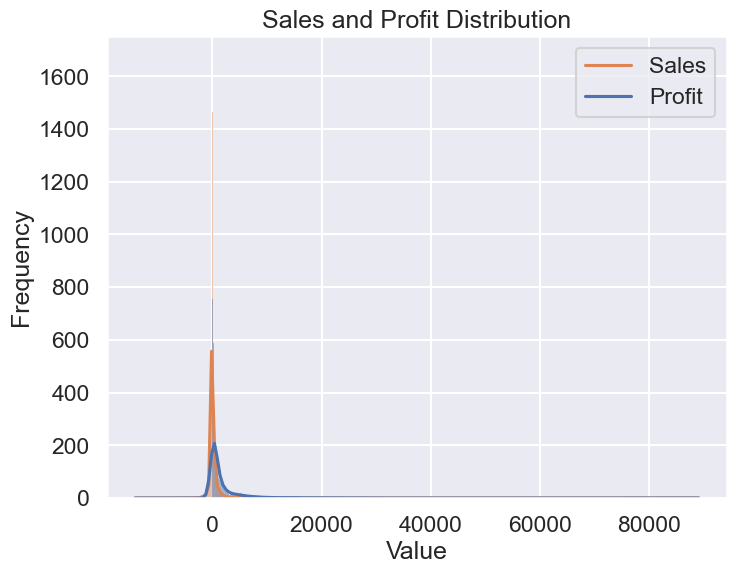

In [76]:
# Sales and Profit Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df[['sales', 'profit']], kde=True)
plt.title('Sales and Profit Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Sales', 'Profit'])  # Adding legend for clarity
plt.show()

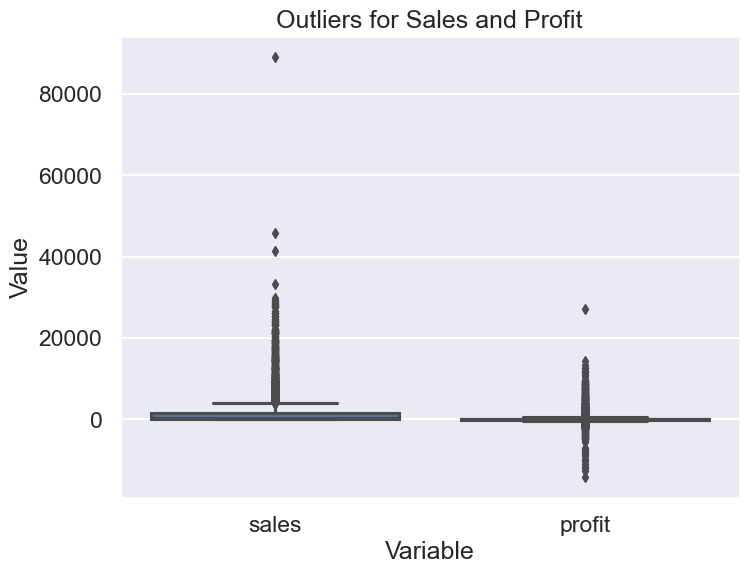

In [79]:
# Checking for outliers for 'sales' and 'profit'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['sales', 'profit']], showfliers=True)
plt.title('Outliers for Sales and Profit')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

Summary:
- **Handling Outliers:** The distribution of sales and profit is more concentrated, with fewer extreme values. So, we will not remove these values since they might provide us valuable insights in our further analysis.
- **Missing Values:** The columns 'customer_age' and 'product_base_margin' have missing values. We will replace the missing `cutomer_age` with the mean age as we don't want to lose 903/8399 rows of data and our subsequent analysis does not include customer age. We will only drop the 63 rows with missing values for `product_base_margin` as we cannot substutue values for this variable without affecting our subsequent analysis.
- **Data Types:** Some columns, such as 'order_date' and 'ship_date', are currently of type 'object'; so we will convert them to datetime for temporal analysis.
- **High Cardinality:** 'order id', 'row id' and 'zip_code' exhibit high cardinality, which will impact model complexity. 
For example, there are 5496 unique order ids in the dataset, so including 'order_id' as a fixed effect would result in creating 5495 dummy variables which is not practical. While this is technically feasible, it will lead to a model with a large number of parameters. Having a high number of dummy variables can make the model more complex, potentially leading to issues like overfitting, increased computation time, and difficulties in interpretation.
- **Low Cardinality:** 'number_of_records' has only a single value i.e. 1. So we need to drop this column as well


### Data Cleaning

In [65]:
# Handling missing values
# Replace missing values for 'customer_age' with the mean age
df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
df = df.dropna()  # Drop other rows with missing values

In [66]:
# Dropping Unnecessary Columns
df = df.drop(['number_of_records', 'order_id', 'row_id', 'zip_code'], axis=1)  

In [68]:
# DataType Conversions
df['customer_age'] = df['customer_age'].astype(int)  # Convert 'customer_age' to integer
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert 'order_date' to datetime
df['ship_date'] = pd.to_datetime(df['ship_date'])  # Convert 'ship_date' to datetime

In [71]:
# Summary Statistics of cleaned Data
df.describe()

,customer_age,discount,order_date,order_quantity,product_base_margin,profit,sales,ship_date,shipping_cost,unit_price
count,8336.000000,8336.000000,8336,8336.000000,8336.000000,8336.000000,8336.000000,8336,8336.000000,8336.000000
mean,54.484045,0.049616,2013-12-24 14:37:42.955854336,25.573896,0.512513,178.411589,1757.100276,2013-12-26 15:27:27.984644608,12.717320,88.716087
min,41.000000,0.000000,2012-01-01 00:00:00,1.000000,0.350000,-14140.701600,2.240000,2012-01-02 00:00:00,0.490000,0.990000
25%,47.000000,0.020000,2012-12-20 00:00:00,13.000000,0.380000,-83.205000,141.971625,2012-12-23 00:00:00,3.140000,6.480000
50%,54.000000,0.050000,2013-12-14 00:00:00,26.000000,0.520000,-1.735000,442.740000,2013-12-17 00:00:00,6.050000,20.980000
75%,60.000000,0.080000,2015-01-02 06:00:00,38.000000,0.590000,159.802500,1678.515000,2015-01-04 00:00:00,13.990000,85.990000
max,95.000000,0.250000,2015-12-30 00:00:00,50.000000,0.850000,27220.690000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000
std,9.006695,0.031809,NaN,14.494657,0.135589,1192.010697,3576.433039,NaN,17.200793,291.195650


#### Summary statistics of the data after cleaning:

The mean value of customer_age is about 54.5 years with a standard deviation of about 9.
The average value of discount is 0.05 (5%) and the maximum value is 0.21 (21%).
The distribution of sales and profit is more concentrated, with fewer extreme values.
shipping_cost and unit_price also show relatively concentrated distributions.
These steps and summary statistics provide us with a better understanding of Walmart's data set, while also helping us prepare for more in-depth analysis.

### Feature Engineering

In [82]:

def feature_engineering(df):
    # Extract features from 'order_date'
    df['order_year'] = df['order_date'].dt.year
    df['order_month'] = df['order_date'].dt.month
    df['order_day_of_week'] = df['order_date'].dt.dayofweek
    df['order_ship_duration'] = (df['ship_date'] - df['order_date']).dt.days

    # Calculate average profit and sales for each product
    product_avg_profit = df.groupby('product_name')['profit'].mean()
    product_avg_sales = df.groupby('product_name')['sales'].mean()
    df['product_avg_profit'] = df['product_name'].map(product_avg_profit)
    df['product_avg_sales'] = df['product_name'].map(product_avg_sales)

    # Calculate total sales and order count for each customer age
    customer_total_sales = df.groupby('customer_age')['sales'].sum()
    customer_order_count = df.groupby('customer_age')['order_date'].count()
    df['customer_total_sales'] = df['customer_age'].map(customer_total_sales)
    df['customer_order_count'] = df['customer_age'].map(customer_order_count)

    # Create binary feature indicating whether a discount is applied
    df['discount_applied'] = (df['discount'] > 0).astype(int)

    # Calculate average sales and profit for each region
    region_avg_sales = df.groupby('region')['sales'].mean()
    region_avg_profit = df.groupby('region')['profit'].mean()
    df['region_avg_sales'] = df['region'].map(region_avg_sales)
    df['region_avg_profit'] = df['region'].map(region_avg_profit)

    # Calculate average unit price for each product category
    category_avg_unit_price = df.groupby('product_category')['unit_price'].mean()
    df['category_avg_unit_price'] = df['product_category'].map(category_avg_unit_price)

feature_engineering(df)

The `feature_engineering` function introduces new features to enhance the dataset for the fixed effects analysis.

1. **Temporal Features from 'order_date':**
   - 'order_year', 'order_month', 'order_day_of_week': Extracted from the 'order_date' to capture temporal patterns.
   - 'order_ship_duration': Represents the duration between order and shipment dates.

2. **Product-Level Features:**
   - 'product_avg_profit' and 'product_avg_sales': Capture the average profit and sales for each product.

3. **Customer-Age Level Features:**
   - 'customer_total_sales' and 'customer_order_count': Represent the total sales and order count for each customer age.

4. **Binary Feature for Discount:**
   - 'discount_applied': Indicates whether a discount is applied (1 if discount > 0, 0 otherwise).

5. **Region-Level Features:**
   - 'region_avg_sales' and 'region_avg_profit': Reflect the average sales and profit for each region.

6. **Category-Level Feature:**
   - 'category_avg_unit_price': Represents the average unit price for each product category.

These engineered features provide additional insights into temporal trends, product performance, customer behavior, and regional patterns, enhancing the dataset for the subsequent fixed effects modeling.

In [95]:
# Reset the numbering index
df = df.reset_index(drop=True)
# Move the 'sales' column to the last position
df= df[[col for col in df.columns if col != 'sales'] + ['sales']]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     8336 non-null   object        
 1   customer_age             8336 non-null   int32         
 2   customer_name            8336 non-null   object        
 3   customer_segment         8336 non-null   object        
 4   discount                 8336 non-null   float64       
 5   order_date               8336 non-null   datetime64[ns]
 6   order_priority           8336 non-null   object        
 7   order_quantity           8336 non-null   int64         
 8   product_base_margin      8336 non-null   float64       
 9   product_category         8336 non-null   object        
 10  product_container        8336 non-null   object        
 11  product_name             8336 non-null   object        
 12  product_sub_category     8336 non-

### Visual Analytics

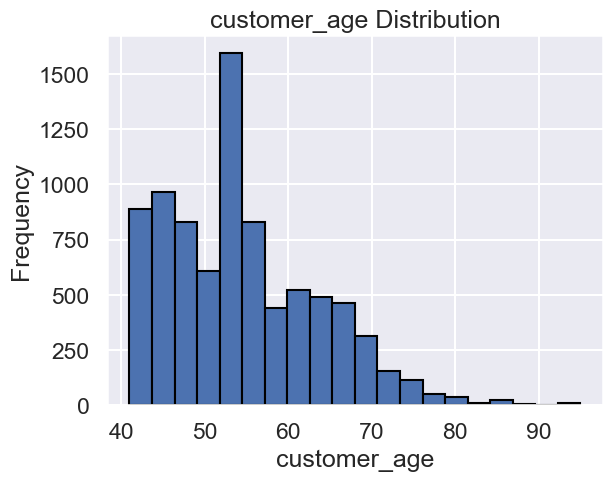

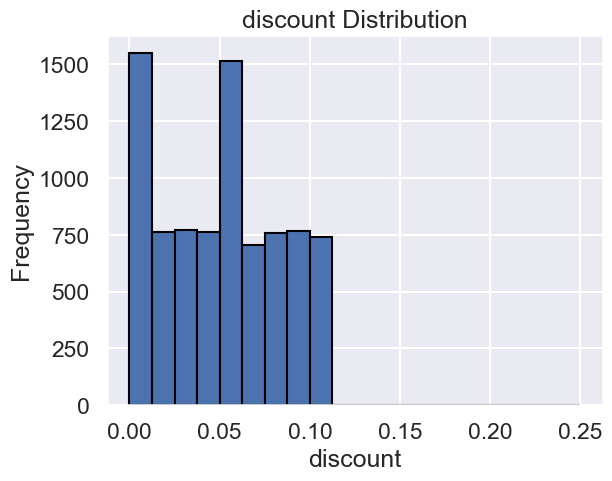

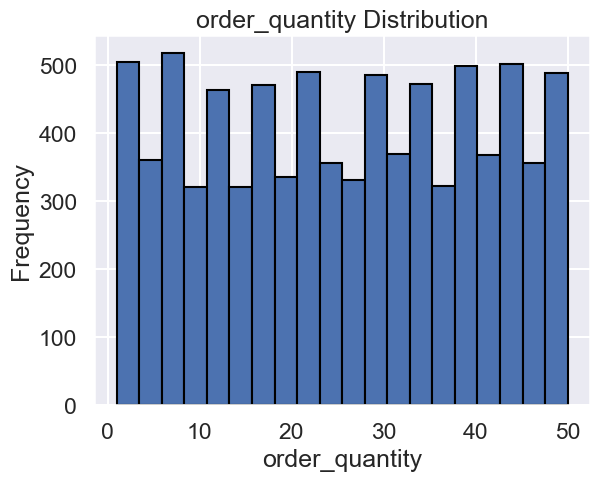

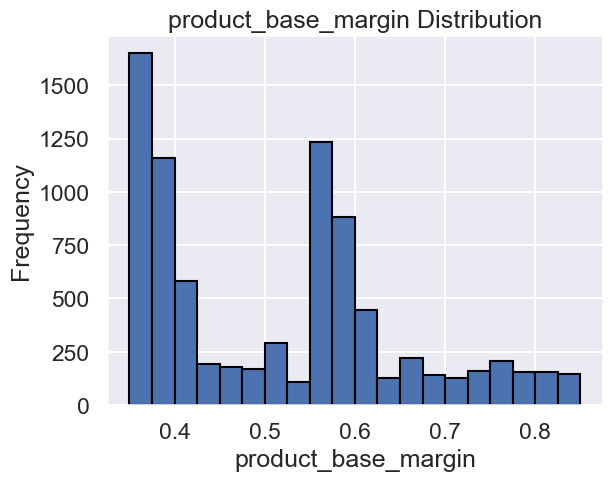

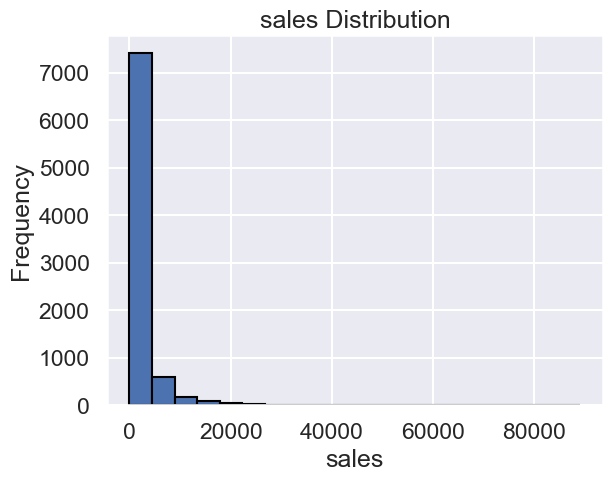

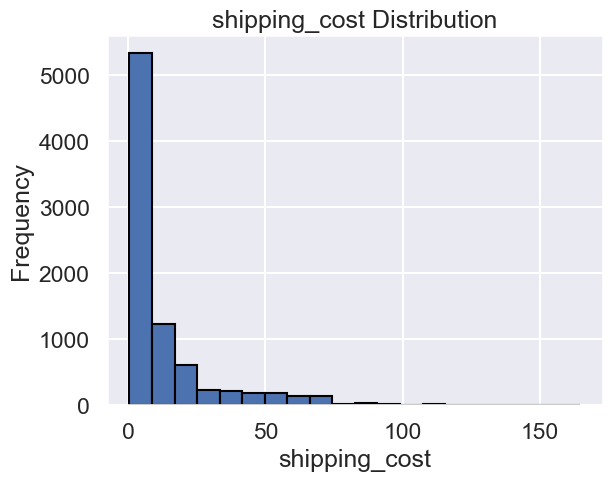

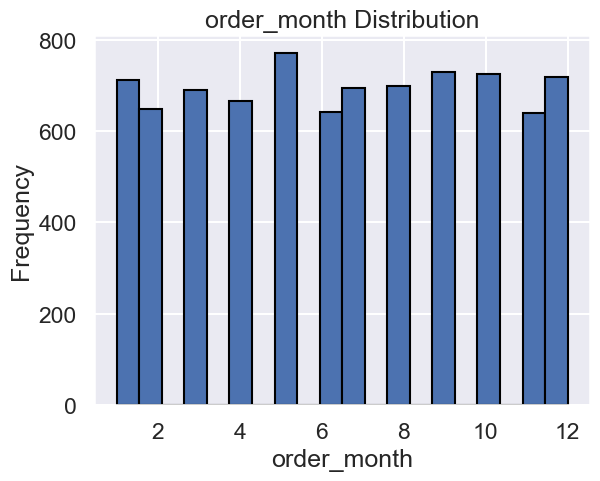

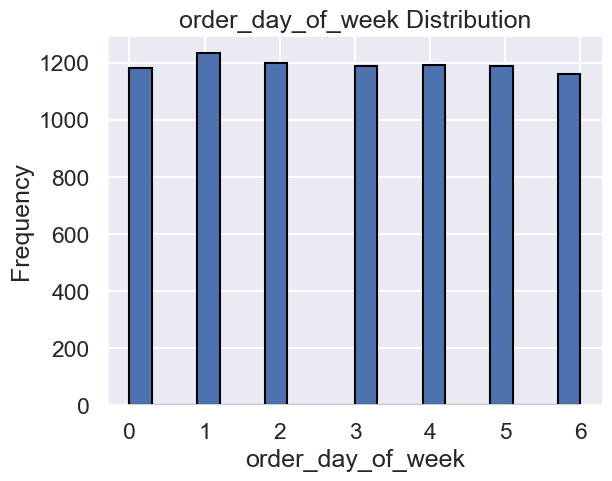

In [83]:
# Histograms for numerical columns
numerical_cols = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'sales', 'shipping_cost', 'order_month',
       'order_day_of_week']

for col in numerical_cols:
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Count of Orders for Each Ship Mode')

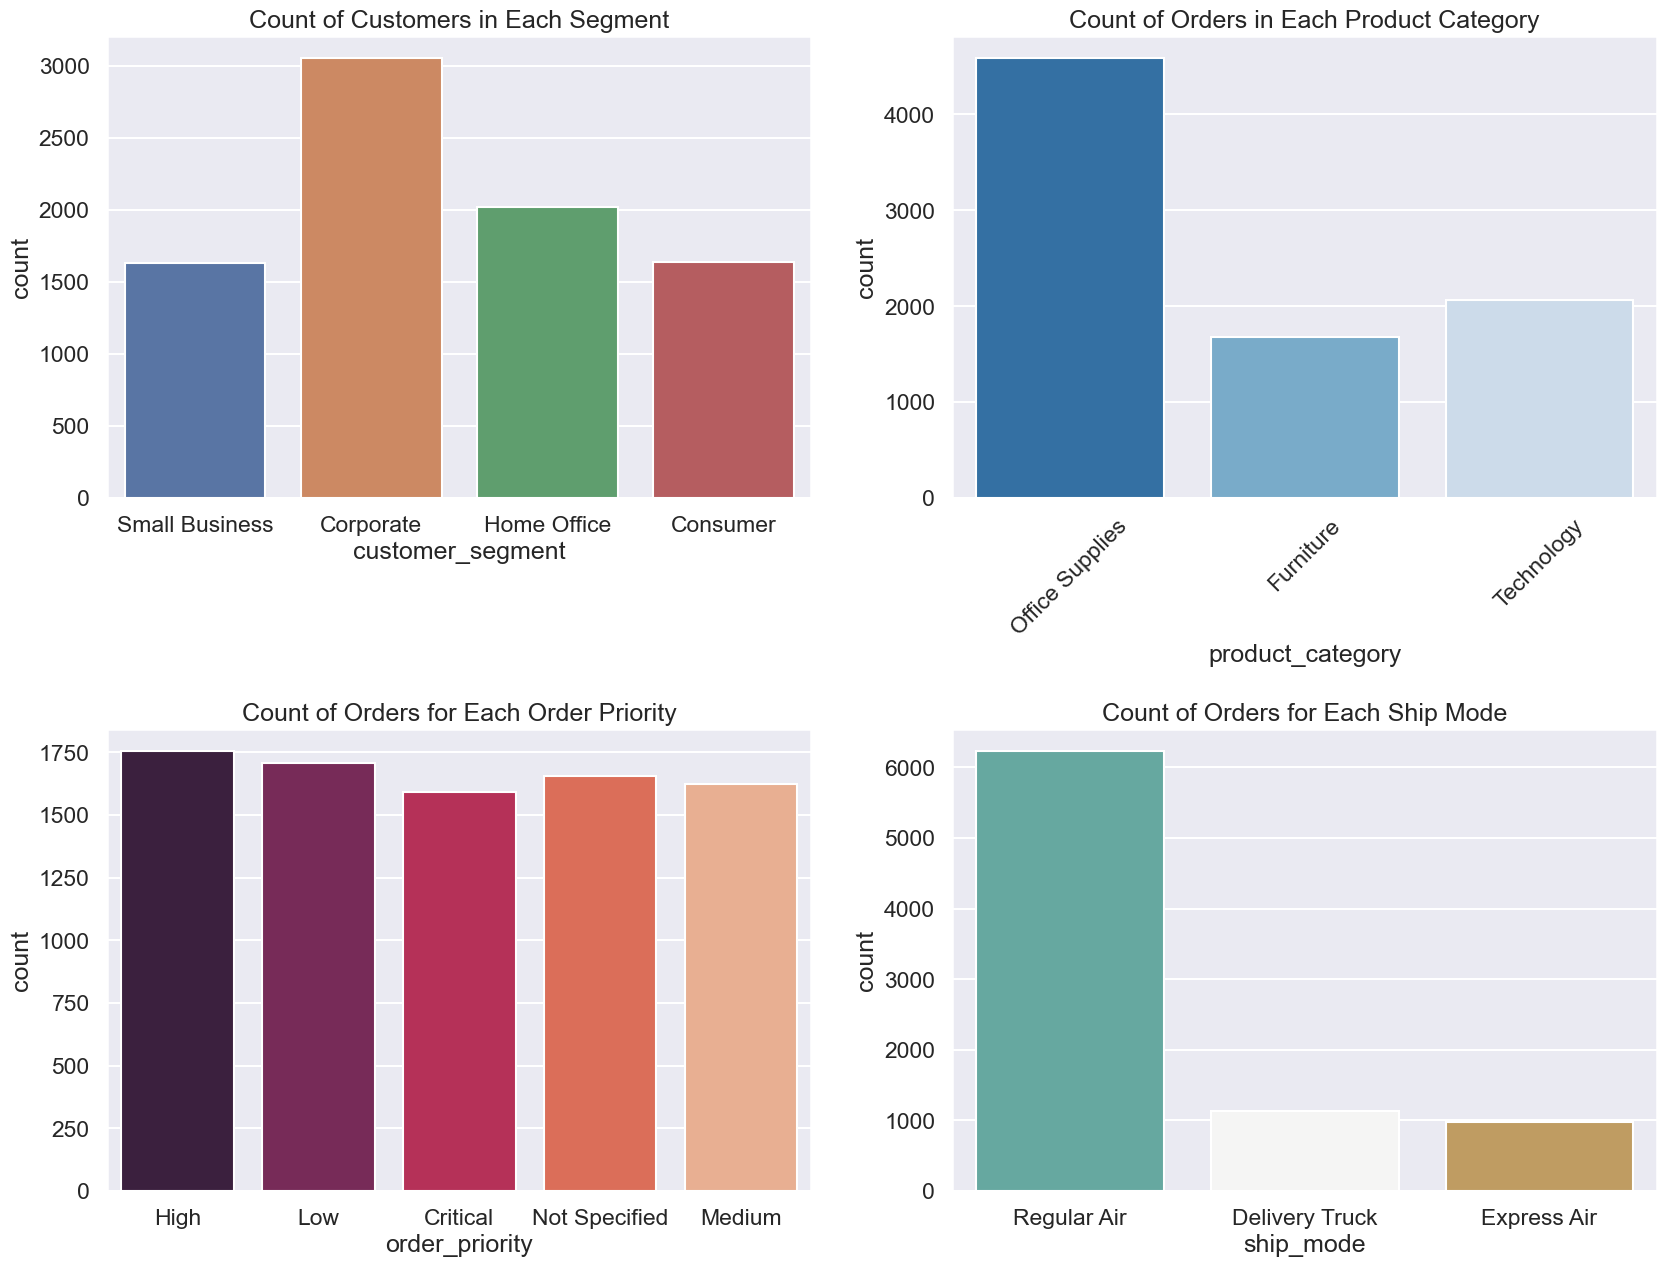

In [84]:
# Set up the matplotlib figure for count plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

# Count plots for categorical columns
sns.countplot(ax=axes[0, 0], x='customer_segment', data=df)
axes[0, 0].set_title('Count of Customers in Each Segment')

sns.countplot(ax=axes[0, 1], x='product_category', data=df, palette='Blues_r')
axes[0, 1].set_title('Count of Orders in Each Product Category')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1, 0], x='order_priority', data=df, palette='rocket')
axes[1, 0].set_title('Count of Orders for Each Order Priority')

sns.countplot(ax=axes[1, 1], x='ship_mode', data=df, palette='BrBG_r')
axes[1, 1].set_title('Count of Orders for Each Ship Mode')




<Axes: >

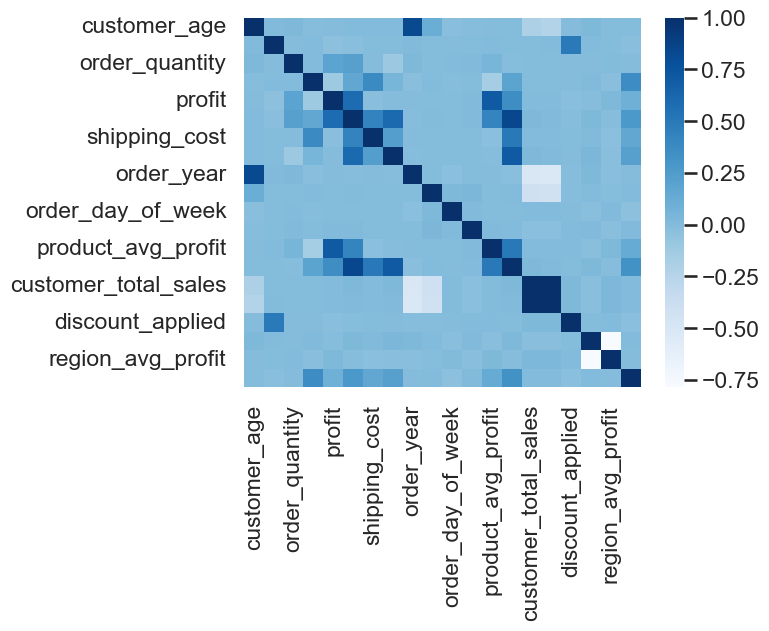

In [85]:
# Correlation Heatmap
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap="Blues")

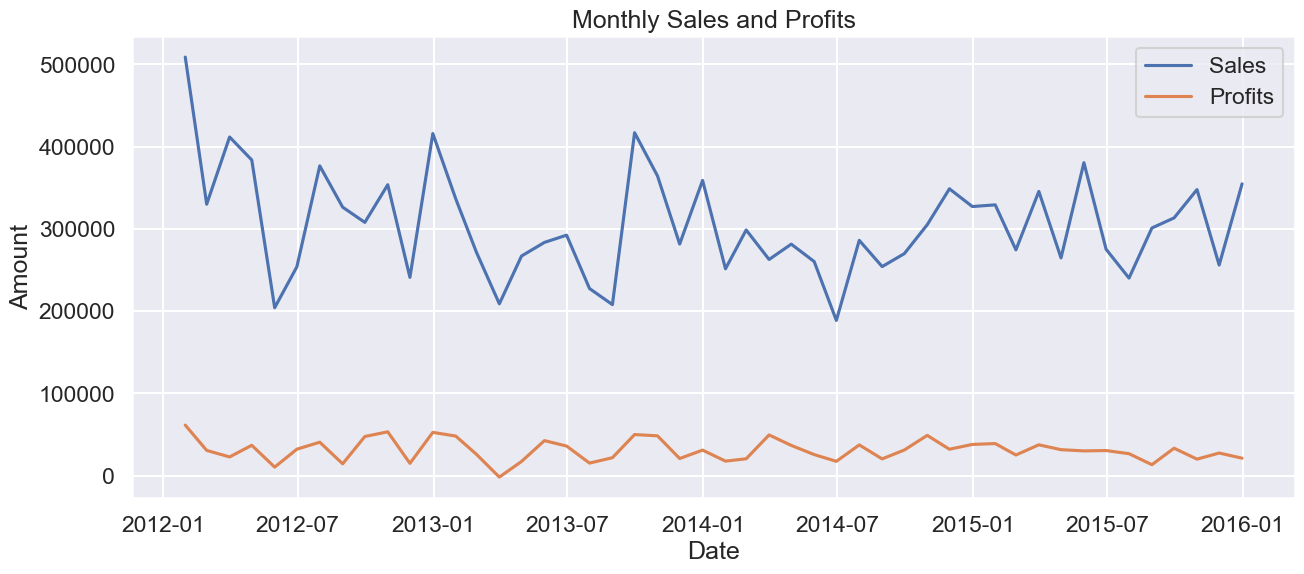

In [86]:
# Monthly Sales and Profits Time Series
fig, plt.figure(figsize=(15, 6))
monthly_sales = df.resample('M', on='order_date')['sales'].sum()
monthly_profits = df.resample('M', on='order_date')['profit'].sum()

plt.plot(monthly_sales, label='Sales')
plt.plot(monthly_profits, label='Profits')
plt.title('Monthly Sales and Profits')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

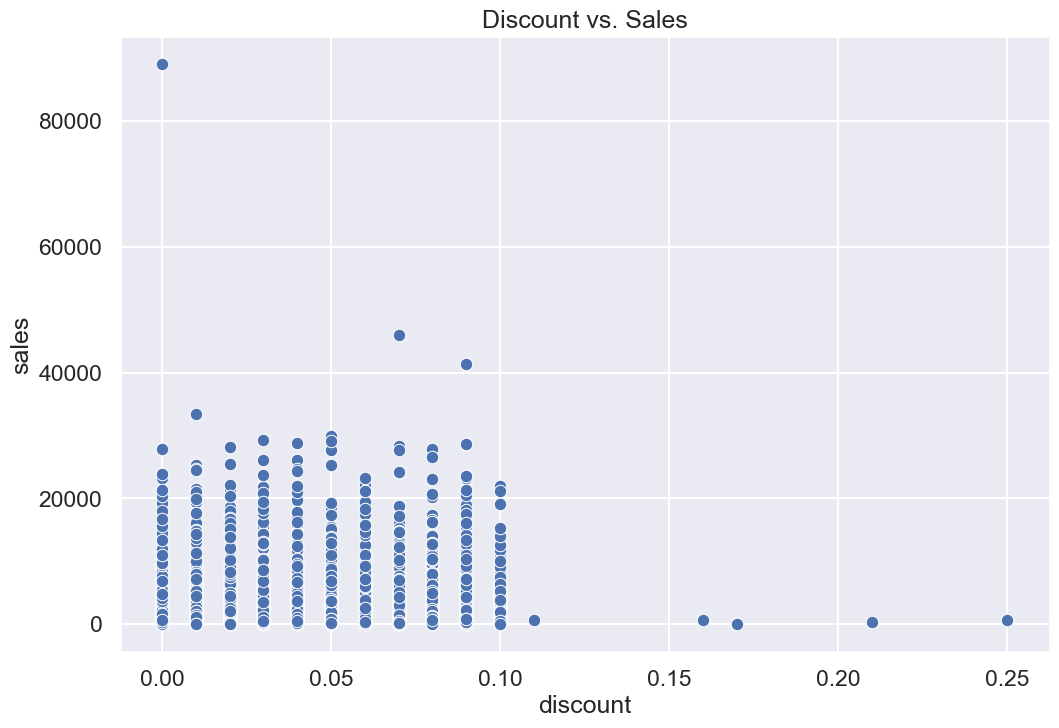

In [87]:
# Scatter Plot for Discount vs. Sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='discount', y='sales', data=df)
plt.title('Discount vs. Sales')
plt.show()

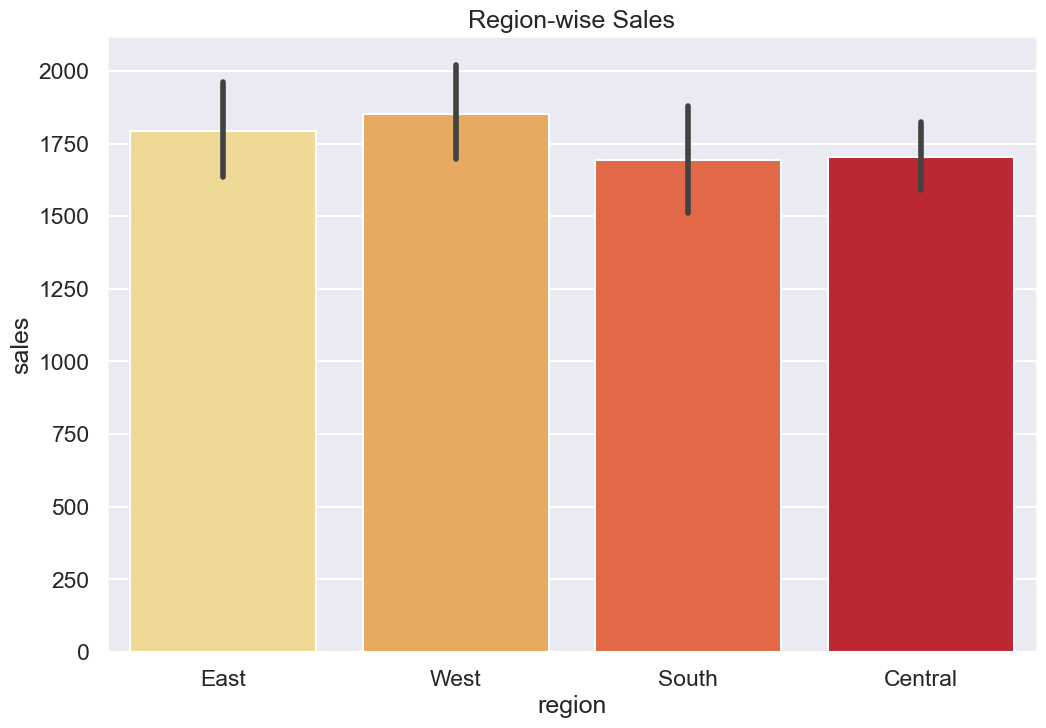

In [88]:
# Bar Plot for Region-wise Sales
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sales', data=df, palette='YlOrRd')
plt.title('Region-wise Sales')
plt.show()

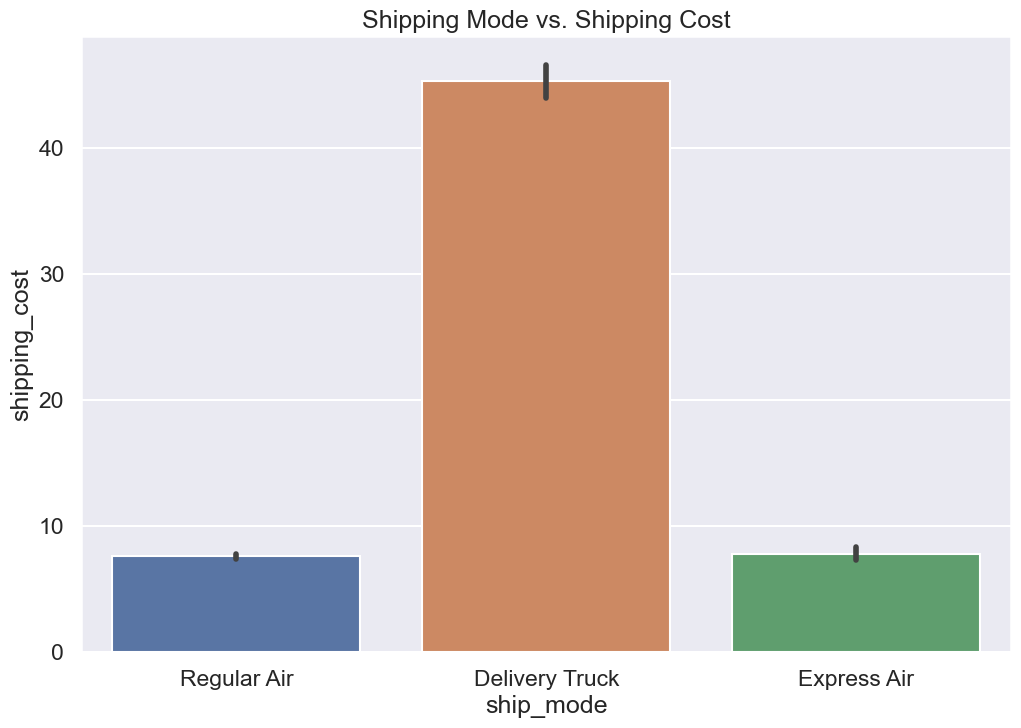

In [89]:
# Bar Plot for Shipping Mode vs. Shipping Cost
plt.figure(figsize=(12, 8))
sns.barplot(x='ship_mode', y='shipping_cost', data=df)
plt.title('Shipping Mode vs. Shipping Cost')
plt.show()

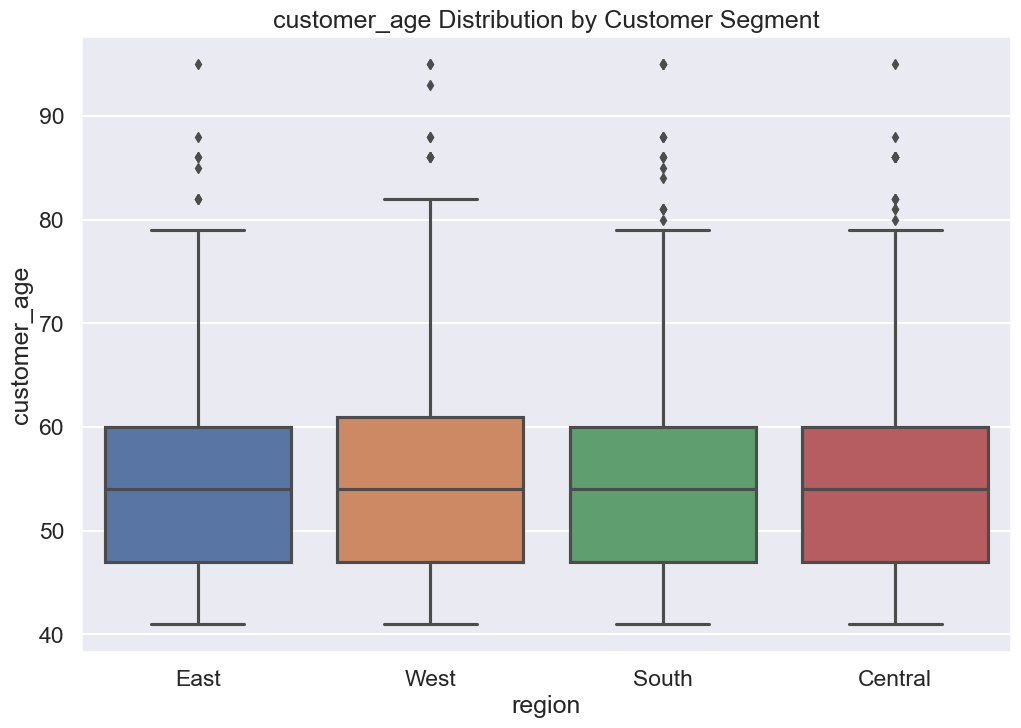

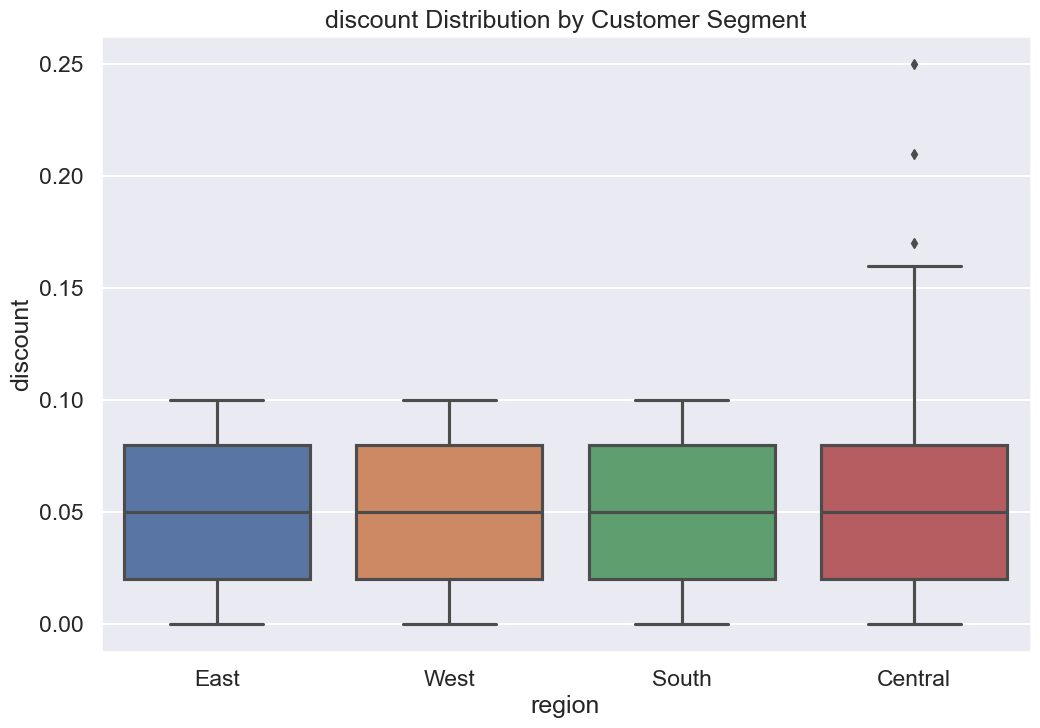

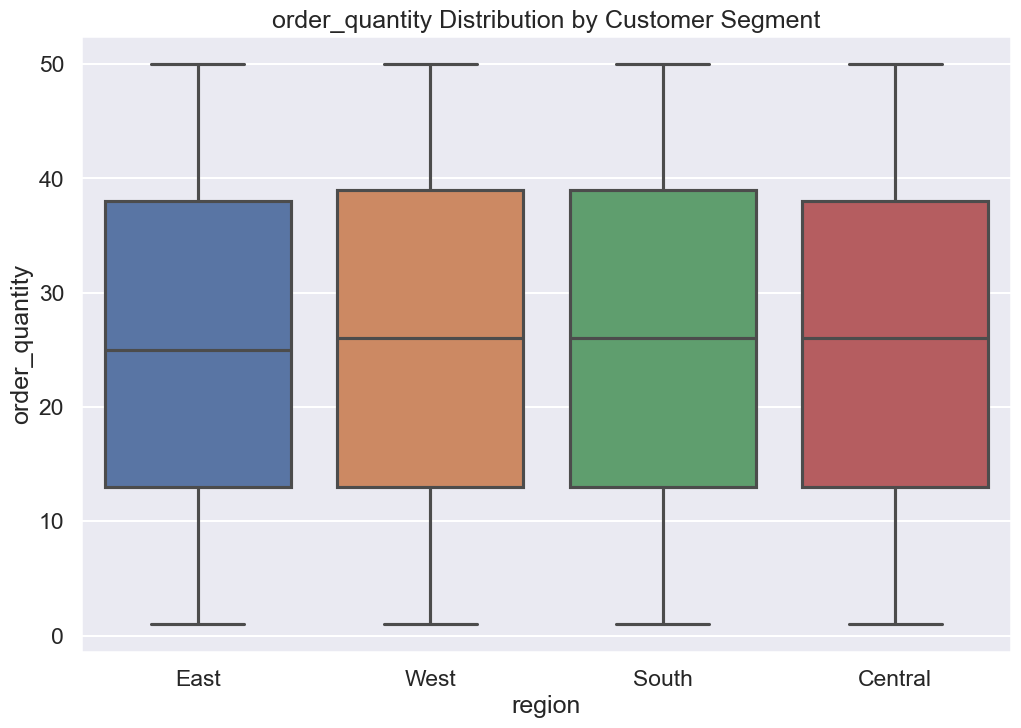

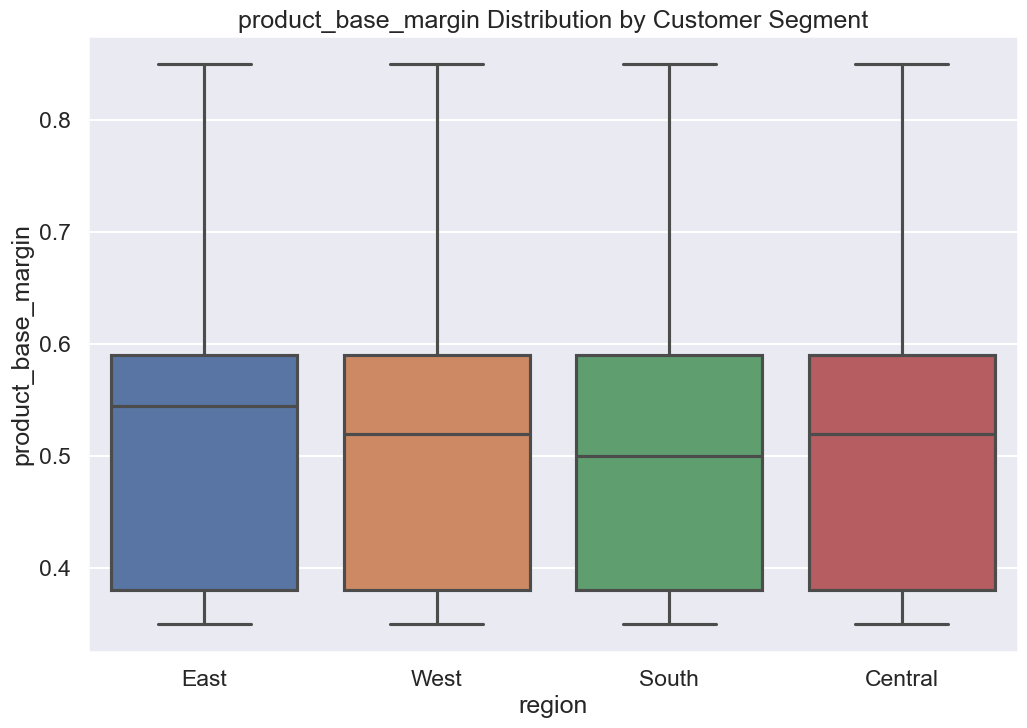

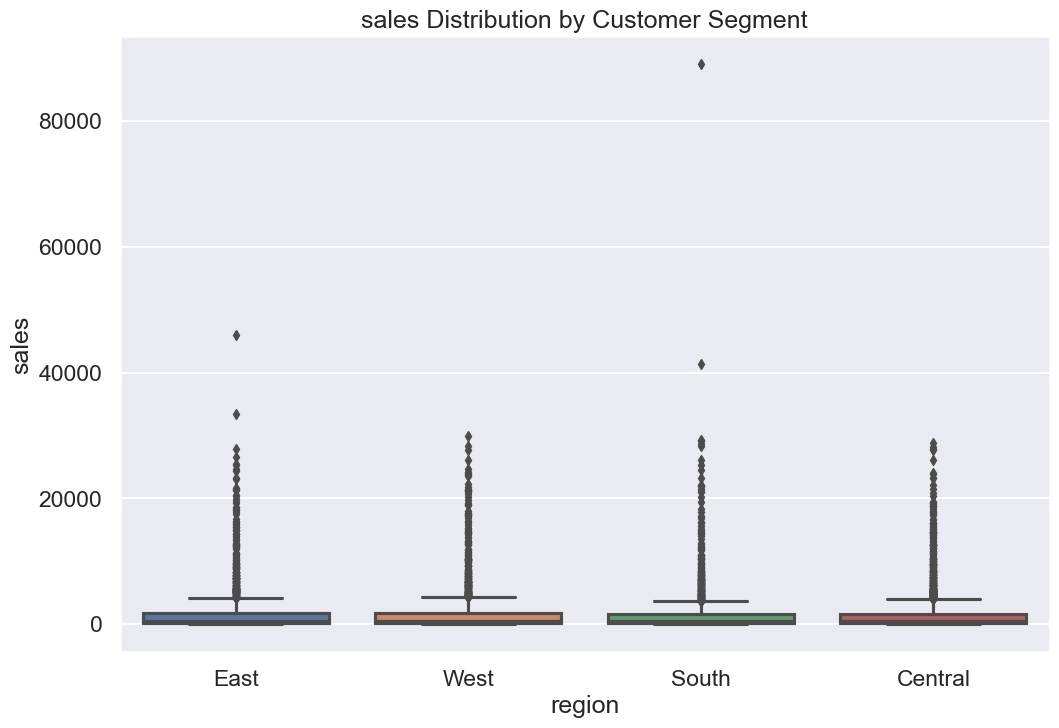

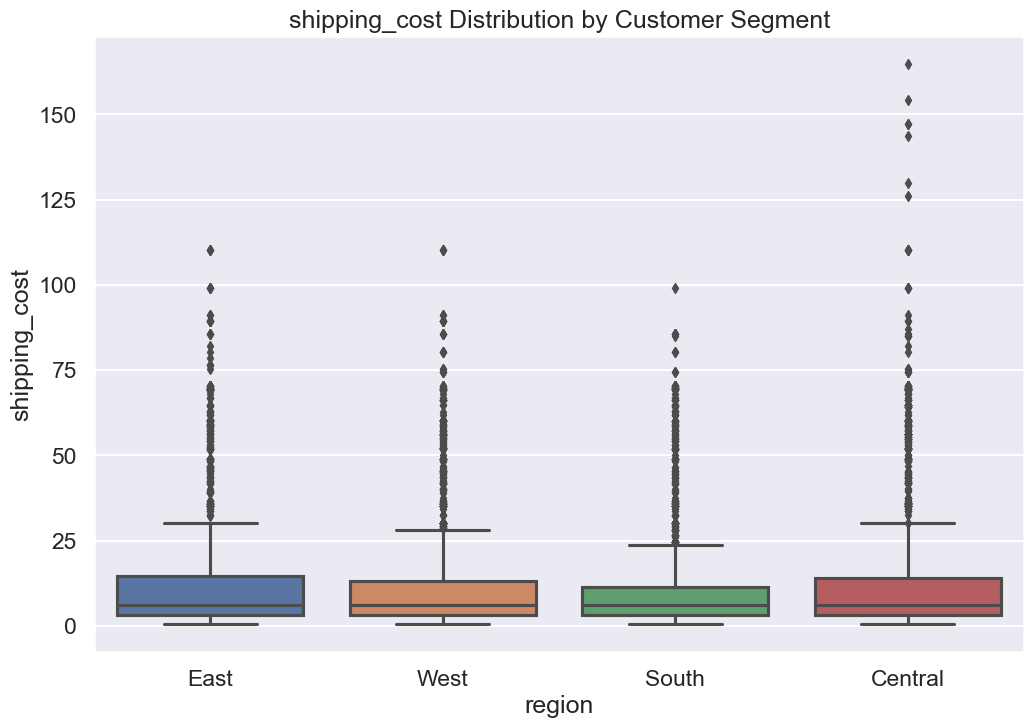

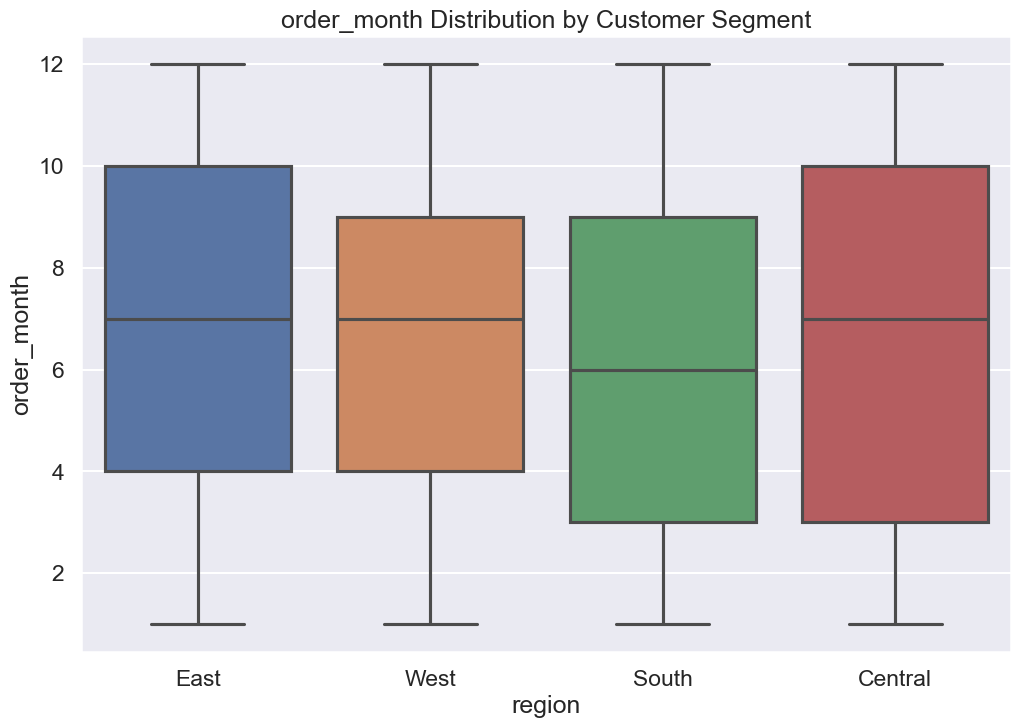

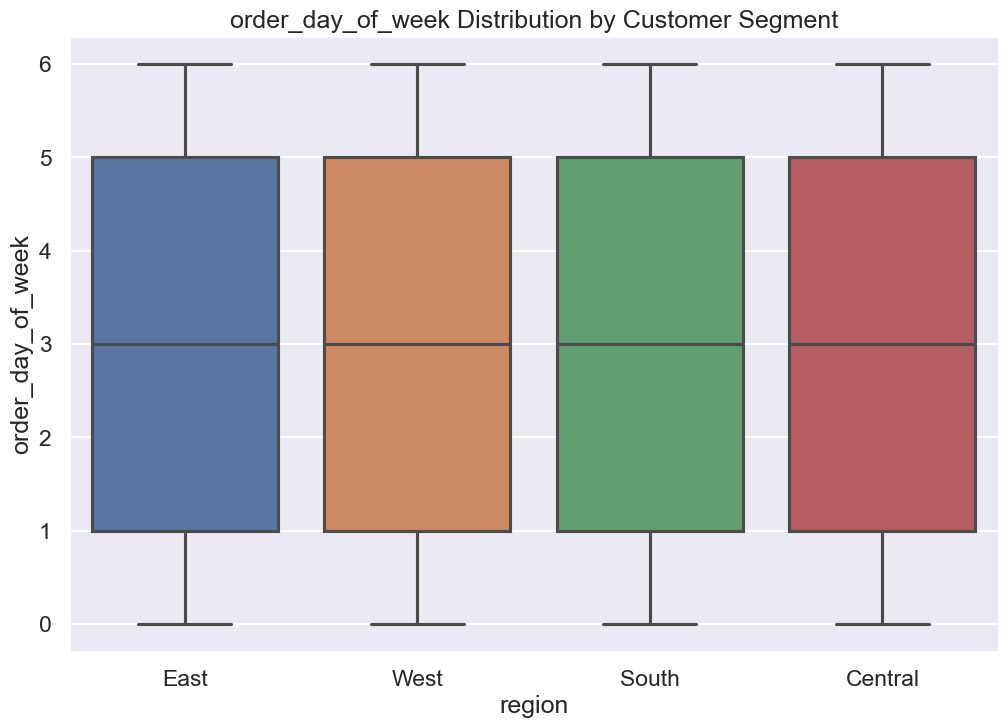

In [90]:
# Box plots for numerical columns by region
numerical_cols = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'sales', 'shipping_cost', 'order_month',
       'order_day_of_week']

for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='region', y=col, data=df)
    plt.title(f'{col} Distribution by Customer Segment')
    plt.show()

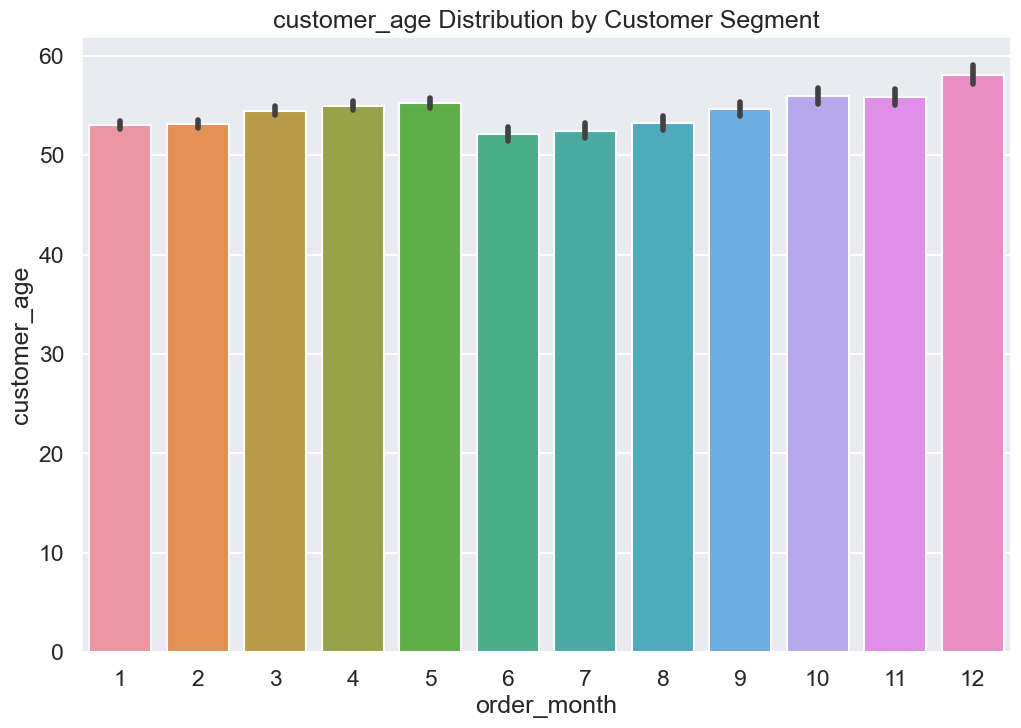

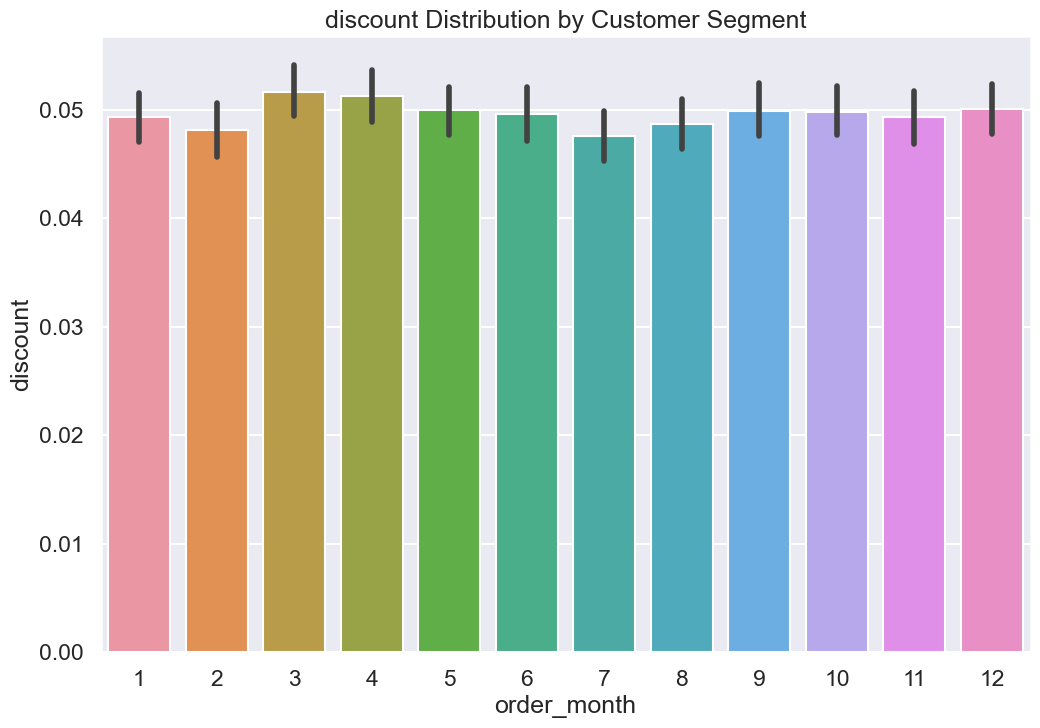

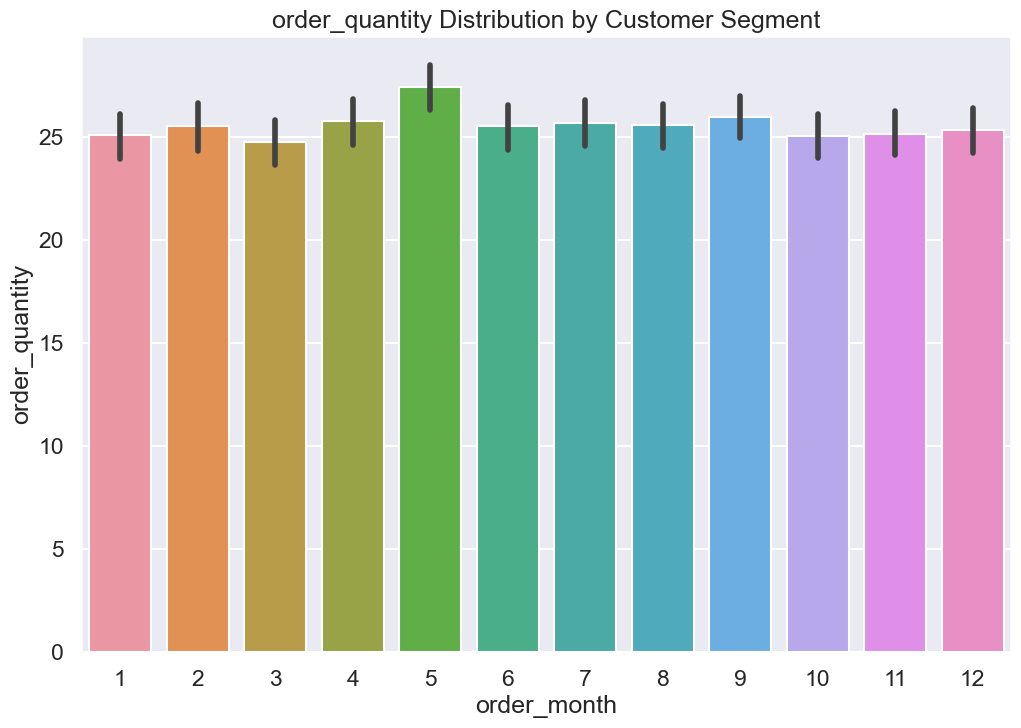

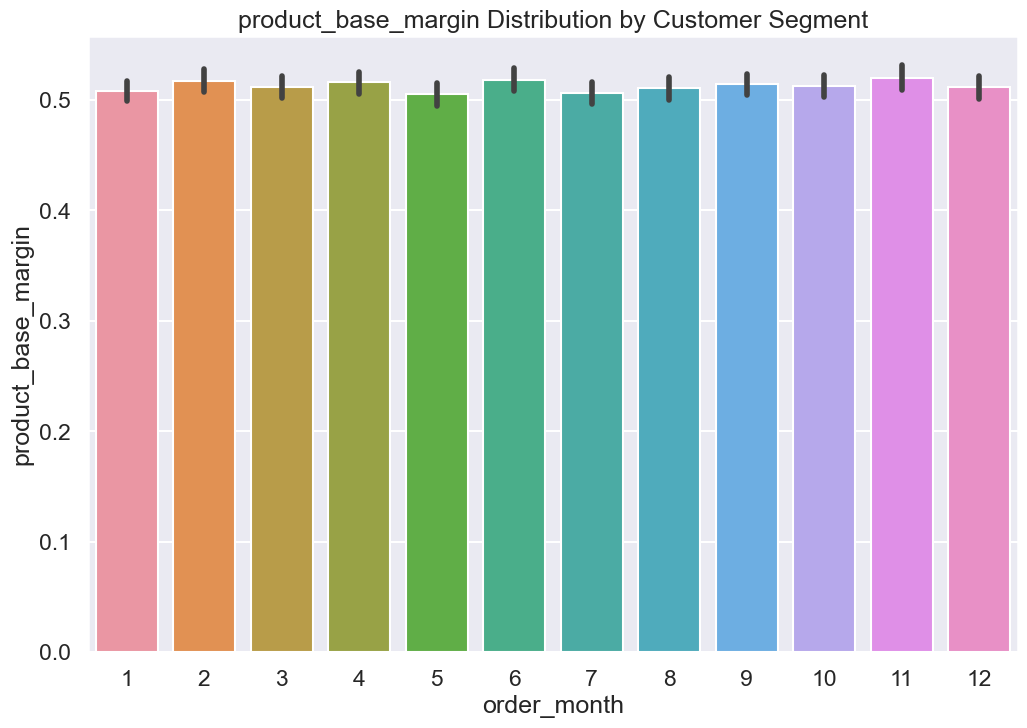

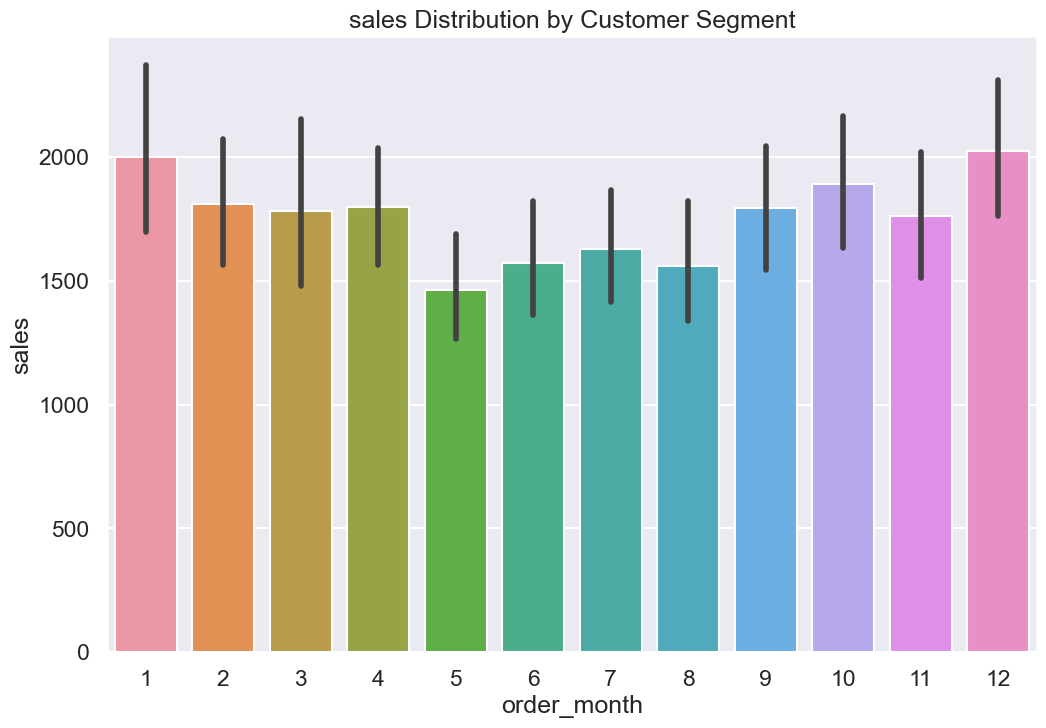

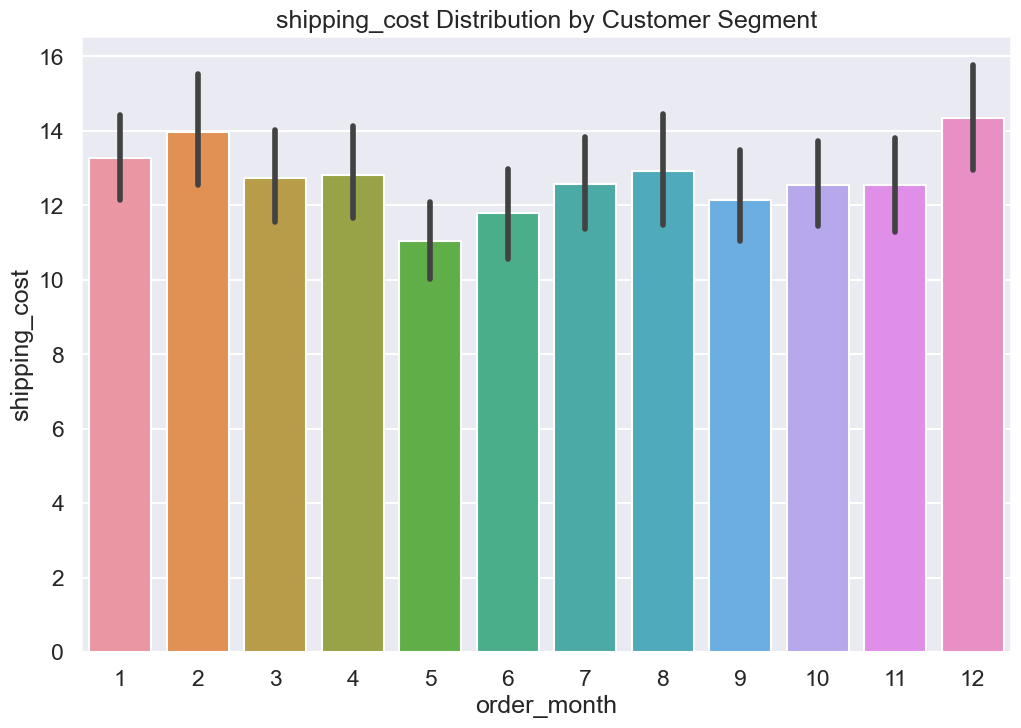

In [91]:
# Box plots for numerical columns by month
numerical_cols = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'sales', 'shipping_cost']

for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='order_month', y=col, data=df)
    plt.title(f'{col} Distribution by Customer Segment')
    plt.show()

# 2. Inference from observational data - Fixed effects Panel Technique (Technique 3)
#### **Selecting the Important Numerical Variables**

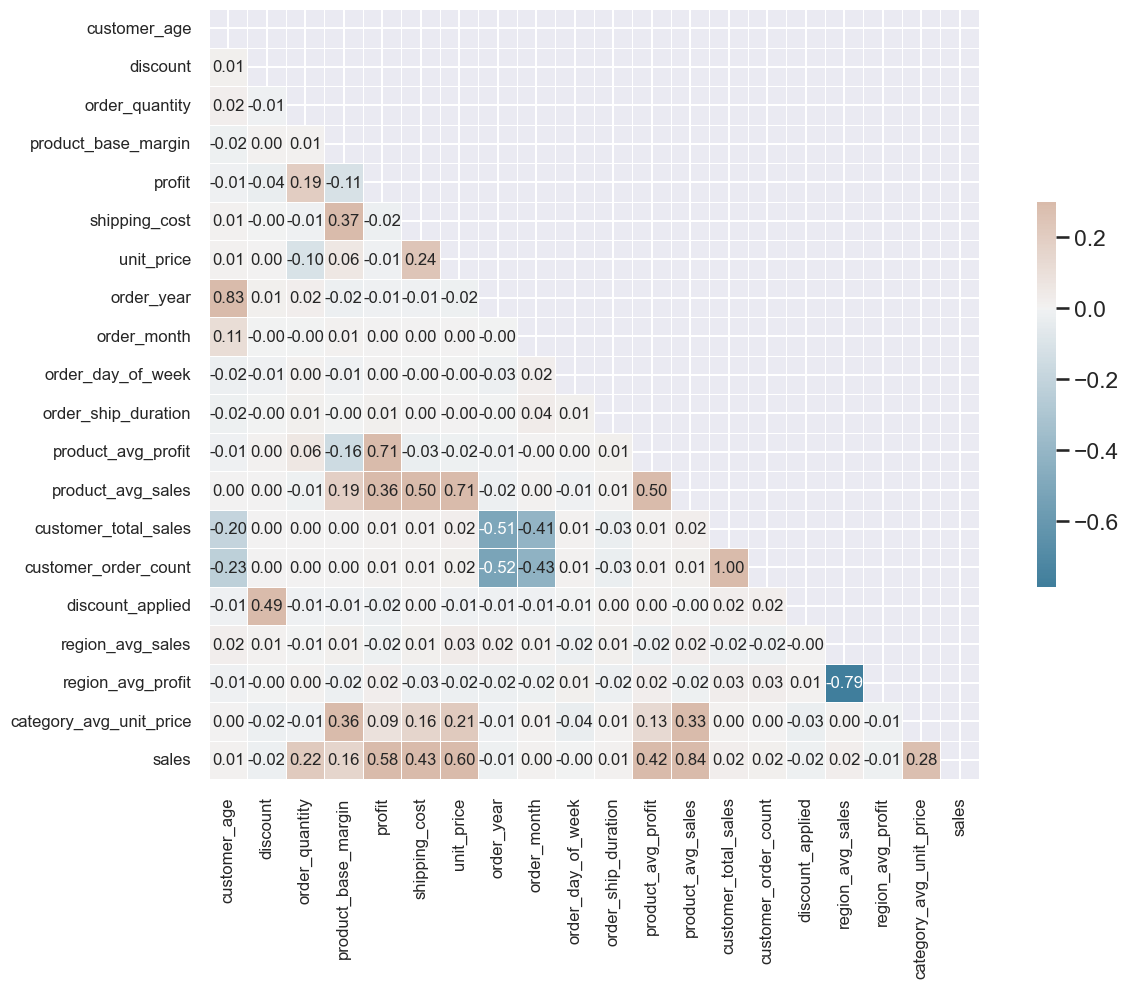

In [97]:
# Plotting Correlation Matrix for all numerical Variables
numerical_columns = df.select_dtypes(include=[np.number])  # select all numerical columns
corr = numerical_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Specify the annotation font size
annot_font_size = 12

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio. Round numbers to 2 digits.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f",annot_kws={"size": annot_font_size})

plt.show()


In [98]:
# Display the correlation of each numerical variable with the dependent variable (sales) in descending order
corr["sales"].sort_values(ascending=False)

sales                      1.000000
product_avg_sales          0.843061
unit_price                 0.603026
profit                     0.584664
shipping_cost              0.430897
product_avg_profit         0.424025
category_avg_unit_price    0.275239
order_quantity             0.218430
product_base_margin        0.156759
customer_total_sales       0.020711
region_avg_sales           0.017993
customer_order_count       0.015459
order_ship_duration        0.011238
customer_age               0.005839
order_month                0.003819
order_day_of_week         -0.002226
region_avg_profit         -0.014134
order_year                -0.014146
discount_applied          -0.017151
discount                  -0.019750
Name: sales, dtype: float64

#### Interpretation of Correlation Values for Sales Prediction

The correlation matrix provides insights into the relationships between numerical variables and the dependent variable (sales). In this analysis, we exclude variables related to sales, price, and profit due to their inherent correlation with sales, as these variables are mathematically derived from sales itself or the sales value is calculated from them, so they are bound to have high positive correlation.

- **Selected Variables (For Further Investigation):**
  - `shipping_cost` (0.430897): Shipping cost has a moderate positive correlation with sales, suggesting that as shipping costs increase, sales also tend to increase.
  
- **Rejected Variables:**
  - Variables related to Sales, Profit, and Price:
    - `product_avg_sales` (0.843061)
    - `profit` (0.584664)
    - `unit_price` (0.603026)
    - `product_avg_profit` (0.424025)

  - Other Variables with weak or Minimal Correlation:
    - `category_avg_unit_price` (0.275239), `order_quantity` (0.218430), `product_base_margin` (0.156759), `region_avg_sales` (0.017993), `order_month` (0.003819), `order_ship_duration` (0.011238), `customer_age` (0.005839), `customer_total_sales` (0.020711), `order_day_of_week` (-0.002226), `order_year` (-0.014146), `discount_applied` (-0.017151), `discount` (-0.019750), `customer_order_count` (0.015459), `region_avg_profit` (-0.014134).

**Selection Criteria:**
- Variables with high positive correlations (above 0.5) related to sales, profit, and price are rejected, as they are mathematically derived from the dependent variable.
- Variables with moderate positive correlations are considered for further investigation.
- Variables with weak correlations have less impact on sales and are not investigated further.


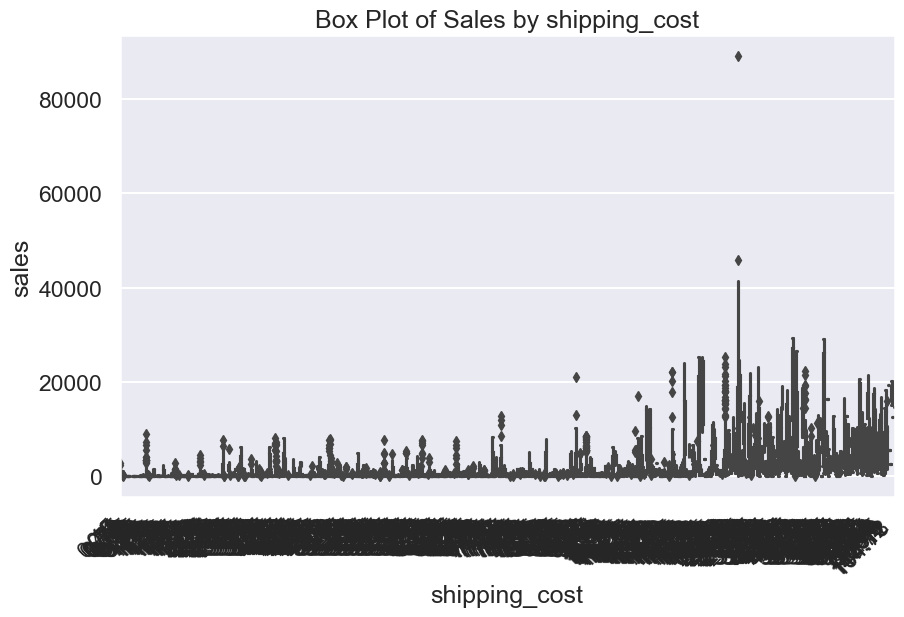

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipping_cost', y='sales', data=df)
plt.title(f'Box Plot of Sales by shipping_cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Conclusion:
We will proceed with only `shipping_cost` as an important numerical variable as the sales value varies considerably with change in shipping cost

#### **Selecting the important Non-Numerical Vriables**

In [100]:
# selecting all non-numerical columns
non_numerical_columns = df.select_dtypes(exclude=[np.number])  
non_numerical_columns.columns

Index(['city', 'customer_name', 'customer_segment', 'order_date',
       'order_priority', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'region', 'ship_date',
       'ship_mode', 'state'],
      dtype='object')

For analyzing the relationship between non-numerical variables and a numerical dependent variable, we will first use statistical tests- ANOVA and the Kruskal-Wallis H-test. These tests will help us understand whether there are statistically significant differences in the means or distributions of the dependent variable across different categories or groups.

##### ANOVA (Analysis of Variance):

- **Assumption:** Assumes that the data follows a normal distribution and that the variances across groups are equal.
- **Objective:** Determines whether there are significant differences in the means of the dependent variable across multiple groups.
- **Output:** Provides an F-statistic and a p-value. A low p-value (< 0.05) suggests that at least one group mean is different from the others.

##### Kruskal-Wallis H-Test:

- **Assumption:** Non-parametric test that does not assume a normal distribution of the data.
- **Objective:** Examines whether there are significant differences in the distributions of the dependent variable across multiple groups.
- **Output:** Provides a H-statistic and a p-value. A low p-value (< 0.05) indicates that at least one group's distribution differs significantly from the others.

In [101]:
# Performing One-way Annova
from scipy.stats import f_oneway

# Initialize an empty dictionary to store ANOVA results
anova_results = {}

# Iterate over non-numerical columns
for column in non_numerical_columns.columns:
    if column != 'sales':  # Exclude the dependent variable
        # Perform ANOVA
        result = f_oneway(*[df['sales'][df[column] == category] for category in df[column].unique()])
        anova_results[column] = (result.statistic, result.pvalue)

# Display the results
for column, (statistic, pvalue) in anova_results.items():
    print(f"ANOVA for {column}: F-statistic={statistic}, p-value={pvalue}")

ANOVA for city: F-statistic=0.8898778830012355, p-value=0.9973258560939401
ANOVA for customer_name: F-statistic=1.1073040252020503, p-value=0.024273117501782494
ANOVA for customer_segment: F-statistic=0.5643703381610413, p-value=0.6384821368422298
ANOVA for order_date: F-statistic=1.0933175020772976, p-value=0.01413173666515008
ANOVA for order_priority: F-statistic=1.5889992850537864, p-value=0.17420289136536327
ANOVA for product_category: F-statistic=392.8501927889827, p-value=9.085247251172599e-164
ANOVA for product_container: F-statistic=420.8569247529091, p-value=0.0
ANOVA for product_name: F-statistic=13.901508508723863, p-value=0.0
ANOVA for product_sub_category: F-statistic=238.39455954507562, p-value=0.0
ANOVA for region: F-statistic=0.899463490589403, p-value=0.4405476390084875
ANOVA for ship_date: F-statistic=1.0101043974634243, p-value=0.39934529987406614
ANOVA for ship_mode: F-statistic=812.2604782997369, p-value=5.4e-323
ANOVA for state: F-statistic=0.8375048025048857, p-v

In [102]:
# Performing Kruskal-Wallis H-test
from scipy.stats import kruskal

# Initialize an empty dictionary to store Kruskal-Wallis H-test results
kruskal_results = {}

# Iterate over non-numerical columns
for column in non_numerical_columns.columns:
    if column != 'sales':  # Exclude the dependent variable
        # Perform Kruskal-Wallis H-test
        result = kruskal(*[df['sales'][df[column] == category] for category in df[column].unique()])
        kruskal_results[column] = result

# Display the results
for column, result in kruskal_results.items():
    print(f"Kruskal-Wallis H-test for {column}: H-statistic={result.statistic}, p-value={result.pvalue}")


Kruskal-Wallis H-test for city: H-statistic=1389.288924007547, p-value=0.7085380947326966
Kruskal-Wallis H-test for customer_name: H-statistic=814.5839212373464, p-value=0.29845959218571755
Kruskal-Wallis H-test for customer_segment: H-statistic=2.5082887727474326, p-value=0.47379497877044285
Kruskal-Wallis H-test for order_date: H-statistic=1450.9981592164897, p-value=0.25910718962636986
Kruskal-Wallis H-test for order_priority: H-statistic=4.782513123919833, p-value=0.31034954816784627
Kruskal-Wallis H-test for product_category: H-statistic=1882.8236656152906, p-value=0.0
Kruskal-Wallis H-test for product_container: H-statistic=2577.494467605899, p-value=0.0
Kruskal-Wallis H-test for product_name: H-statistic=6648.952319669935, p-value=0.0
Kruskal-Wallis H-test for product_sub_category: H-statistic=3634.280069378386, p-value=0.0
Kruskal-Wallis H-test for region: H-statistic=1.0491915863879884, p-value=0.7893513755780323
Kruskal-Wallis H-test for ship_date: H-statistic=1472.0849771820

#### Selected for Further Investigation:

- **Order Date:** The ANOVA and Kruskal-Wallis tests indicate a potential impact of order date on sales. Further investigation is warranted.

- **Product Category:** Both ANOVA and Kruskal-Wallis tests show a significant impact of product category on sales.

- **Product Container:** Both ANOVA and Kruskal-Wallis tests reveal a substantial impact of the product container on sales.

- **Product Name:** The ANOVA test suggests a significant impact of the product name on sales.

- **Product Sub-Category:** Both ANOVA and Kruskal-Wallis tests indicate a significant impact of product sub-category on sales.

- **Ship Mode:** Both ANOVA and Kruskal-Wallis tests reveal a substantial impact of the ship mode on sales.

### Rejected for Further Investigation:

- **City:** Both ANOVA and Kruskal-Wallis tests show no significant difference in sales across different cities.

- **Customer Name:** Both ANOVA and Kruskal-Wallis tests indicate no significant impact of customer name on sales.

- **Customer Segment:** Both ANOVA and Kruskal-Wallis tests indicate no significant impact of customer segments on sales.

- **Order Priority:** Both ANOVA and Kruskal-Wallis tests suggest no significant impact of order priority on sales.

- **Region:** Both ANOVA and Kruskal-Wallis tests show no significant difference in sales across different regions.

- **Ship Date:** Both ANOVA and Kruskal-Wallis tests indicate no significant impact of ship date on sales.

- **State:** Both ANOVA and Kruskal-Wallis tests suggest no significant difference in sales across different states.


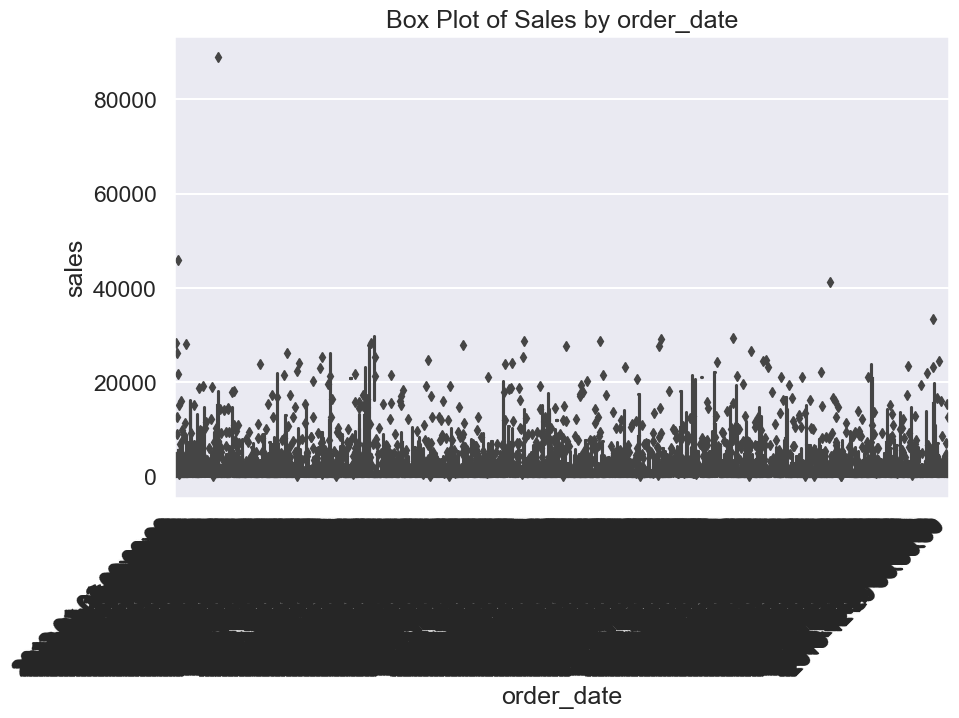

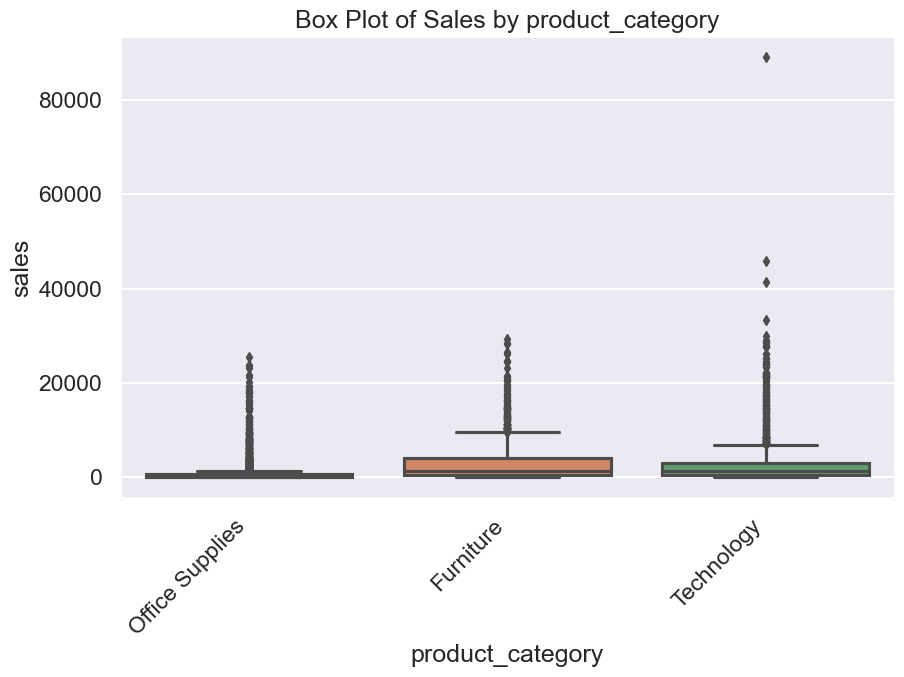

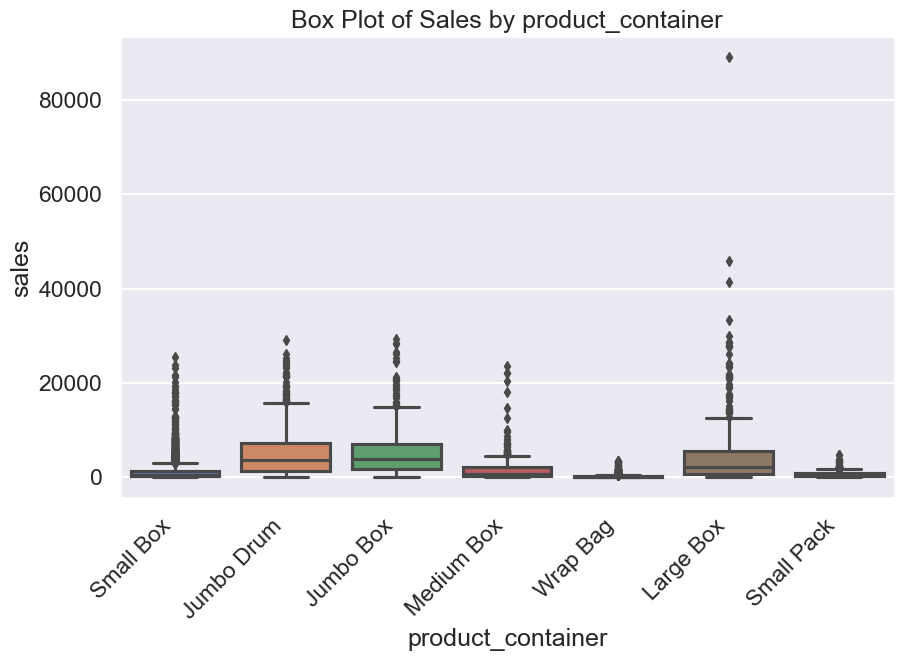

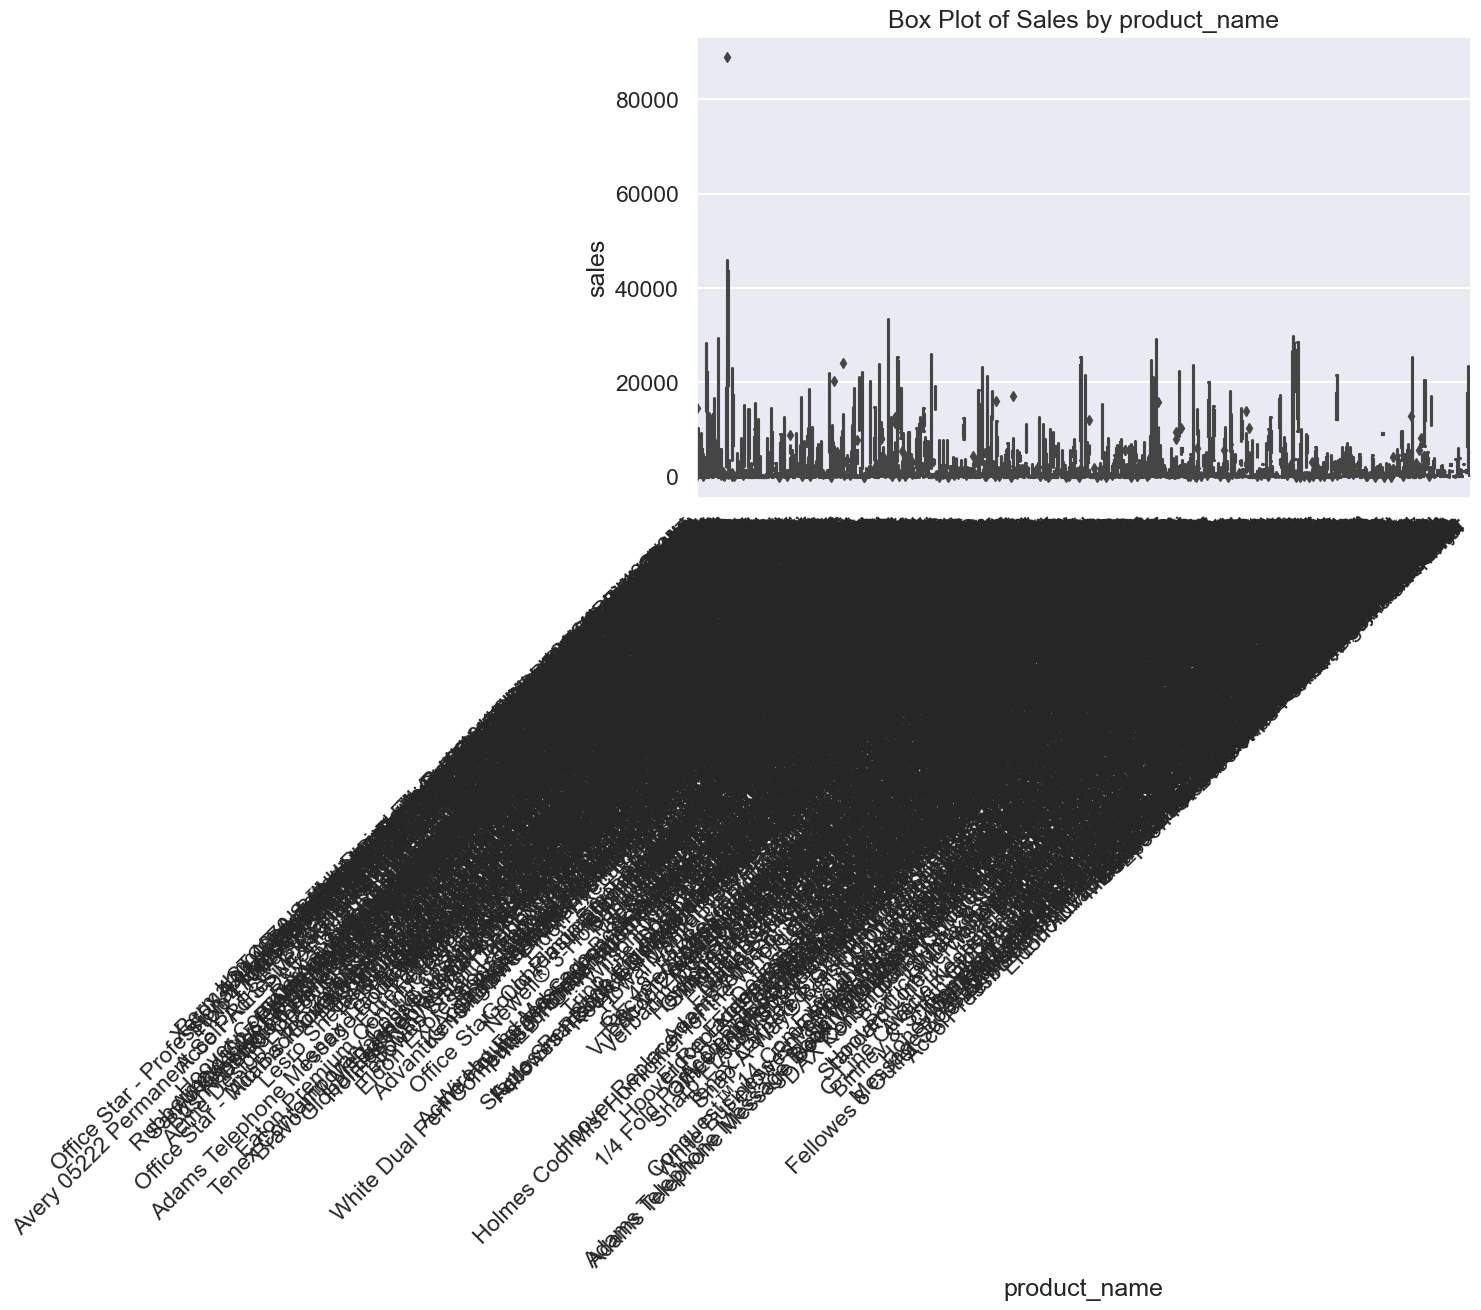

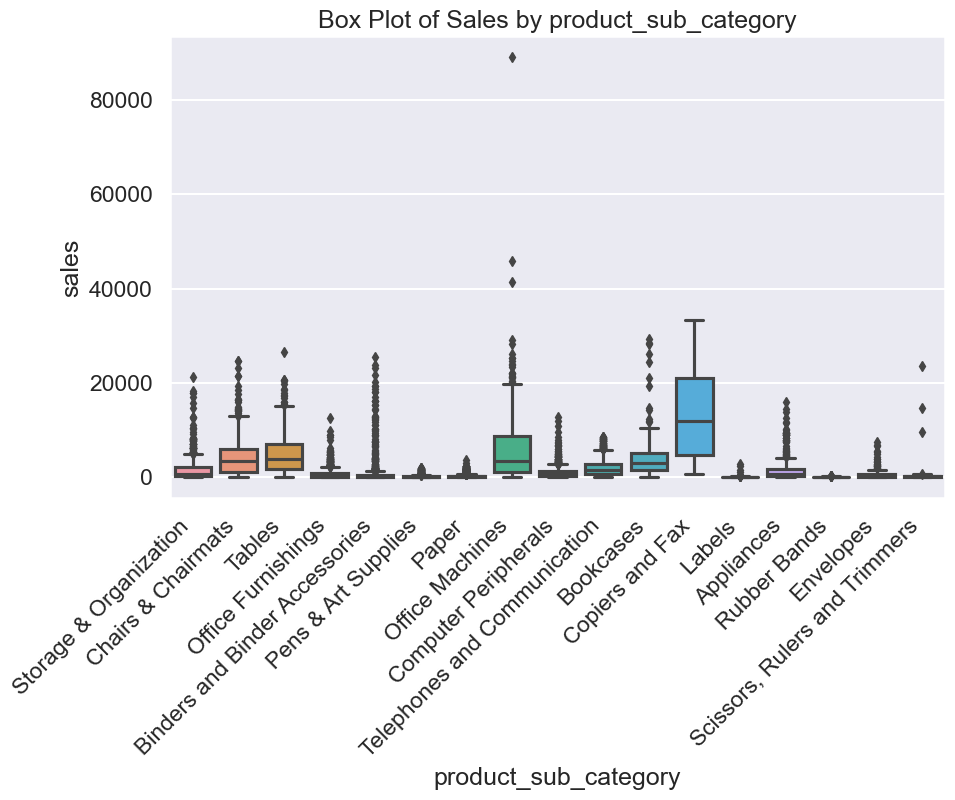

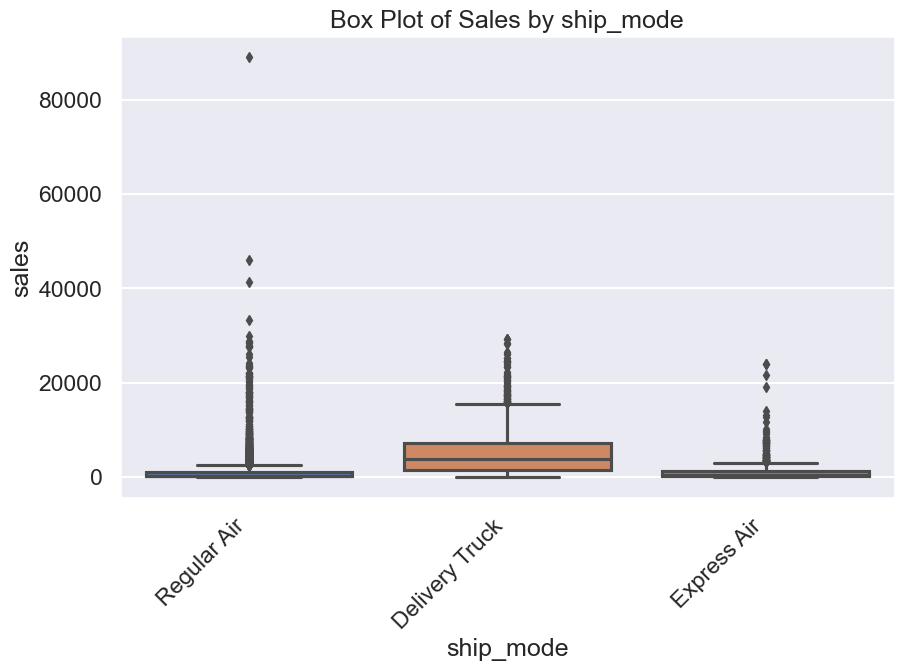

In [103]:
# Selected non-numerical columns
selected_features_non_num = ['order_date', 'product_category', 'product_container', 'product_name','product_sub_category', 'ship_mode']

# Visualize the effects of non-numerical variables on sales using box plots
for column in selected_features_non_num:
    if column != 'sales':  # Exclude the dependent variable
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y='sales', data=df)
        plt.title(f'Box Plot of Sales by {column}')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show()

#### Conclusion:
We can see that all these non-numerical features seem important in determining the sales value. However, we will not proceed with `order_date` and `product_name` due to high number of unique values which is unreasonable for our model since they will lead to high number of dummy variables.

**Final list of selected feature variable(both numerical and non-numerical)** :

`shipping_cost`, `product_category`, `product_container`, `product_sub_category` and `ship_mode`

### MODELLING
Now, we will re-introduce `customer_name`,`customer_segment`,`city` and `order_date` in the selected variable list for a differnt reason.They are needed as indices in the fixed effects model for mitigating omitted variable bias. While initially considered statistically insignificant for predicting sales, these variables serve as essential control factors, capturing unobservable individual and time-specific effects. Fixed effects models, by including these indices, account for entity and time-specific heterogeneity, controlling for factors that may influence sales but remain constant for a given customer over time. This control enhances the model's ability to find the true impact of other predictors on sales, providing more reliable coefficient estimates. The use of fixed effects ensures the exploration of individual and time-related variations, aligning the analysis with the panel data structure's inherent complexities and yielding more accurate and unbiased results.

In [114]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
# Select relevant variables
relevant_columns = ['sales', 'shipping_cost', 'product_category', 'product_container', 'product_sub_category', 'ship_mode', 'order_date', 'customer_name','customer_segment','city']

#### MODEL 1: SELECTING Customer Name as Fixed Enitity

In [116]:
# Create dummy variables for non-numeric categorical features
df_fe1 = pd.get_dummies(df[relevant_columns], columns=['product_category', 'product_container', 'product_sub_category', 'ship_mode'], drop_first=True)

# Set 'customer_name'and 'order_date'  as indexes
df_fe1.set_index(['customer_name','order_date' ], inplace=True)

# Add a constant term for the regression
df_fe1['constant'] = 1

# Fit fixed effects panel model using PanelOLS with entity effects
model_fe = PanelOLS(df_fe1['sales'], sm.add_constant(df_fe1[['shipping_cost', 'constant'] + df_fe1.columns[df_fe1.columns.str.startswith('product_category_')].tolist() + df_fe1.columns[df_fe1.columns.str.startswith('product_container_')].tolist() + df_fe1.columns[df_fe1.columns.str.startswith('product_sub_category_')].tolist() + df_fe1.columns[df_fe1.columns.str.startswith('ship_mode_')].tolist()]), entity_effects=True,check_rank=False,drop_absorbed=True)
results_fe = model_fe.fit(cov_type='kernel', kernel='bartlett')

# Display regression results
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.3643
Estimator:                   PanelOLS   R-squared (Between):              0.2824
No. Observations:                8336   R-squared (Within):               0.3643
Date:                Fri, Dec 01 2023   R-squared (Overall):              0.3588
Time:                        14:22:04   Log-likelihood                -7.769e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      172.26
Entities:                         795   P-value                           0.0000
Avg Obs:                       10.486   Distribution:                 F(25,7516)
Min Obs:                       1.0000                                           
Max Obs:                       40.000   F-statistic (robust):             101.44
                            

### PanelOLS Estimation Model 1 Summary

#### R-squared:

- **Overall R-squared:** 0.3643 indicates that the model explains about 36.43% of the total variation in sales. This suggests a substantial portion of the variability in sales can be explained by the included variables.

- **R-squared (Between):** 0.2824 represents the proportion of variation in sales attributed to individual-specific effects.

- **R-squared (Within):** 0.3643 indicates the proportion of variation in sales explained by time-varying factors within entities.

---

#### Entity and Time Periods:

- **Entities:** 795 distinct entities (individuals, entities, or groups in the dataset).
  
- **Time periods:** 1418 time periods.

---

#### F-statistic:

- **F-statistic:** 172.26 indicates that the model is statistically significant.
  
- **P-value:** 0.0000 confirms the statistical significance.

---

#### Parameter Estimates:

- **Constant and Shipping Cost:**
  - **Constant:** 2548.7 is the estimated intercept term.
  - **Shipping Cost:** A one-unit increase in shipping cost is associated with a 50.643 increase in sales.

- **Product Categories and Containers:**
  - Different product categories and containers have varying effects on sales, with some having positive coefficients and others negative.

- **Product Sub-Categories:**
  - The coefficients for different product sub-categories indicate their respective impact on sales.

- **Ship Modes:**
  - 'Express Air' and 'Regular Air' have negative coefficients, suggesting that choosing these shipping modes is associated with lower sales.

---

#### F-test for Poolability:

- **Poolability Test:**
  - **F-test statistic:** 1.1918
  - **P-value:** 0.0003
  - **Conclusion:** The poolability test assesses whether the individual-specific effects are jointly equal to zero. With a significant p-value (0.0003), we reject the null hypothesis, suggesting that individual-specific effects are significantly different from zero. This implies that there is evidence to suggest that individual entities(different customers)exhibit unique behaviors that consistently impact sales.

---

#### Included Effects:

- **Entity Effects:**
  - The model includes entity (individual) fixed effects to account for unobserved individual-specific factors affecting sales.

---

### Inferences:

---

#### Key Drivers of Sales:

---

1. **Constant and Shipping Cost:**
   - The intercept (constant) term of 2548.7 represents the estimated baseline sales when all other variables are zero.
   - Shipping cost has a positive coefficient, indicating that an increase in shipping cost is associated with an increase in sales. This suggests that customers might be willing to pay more for shipping if it leads to higher convenience or speed.

---

2. **Product Categories and Containers:**
   - **Office Supplies and Technology:** Positive coefficients for these categories imply that sales are higher for products falling under these categories. This could suggest that customers have a higher demand for office supplies and technology-related products.
   - **Jumbo Drum:** Negative coefficient suggests that this container has a negative impact on sales, potentially indicating that customers prefer smaller or differently shaped packaging.

---

3. **Product Sub-Categories:**
   - **Computer Peripherals:** Negative coefficient suggests that this category may negatively impact sales. This could be due to factors like rapid technological changes leading to lower demand for specific peripherals.
   - **Copiers and Fax:** With a substantial positive coefficient, this sub-category significantly drives up sales. This suggests that high-end office equipment, such as copiers and fax machines, is a strong contributor to overall sales.

---

4. **Ship Modes:**
   - **Express Air and Regular Air:** Negative coefficients for these shipping modes suggest that customers might be sensitive to higher shipping costs associated with faster delivery. This could be an essential consideration for pricing and logistics strategies.

---

In summary, the model provides valuable insights into the factors influencing sales for Walmart, considering individual-specific effects and highlighting key drivers that contribute to variations in sales. The poolability test indicates that individual entities exhibit unique behaviors that impact sales significantly.


#### MODEL 2: SELECTING Customer Segment as Fixed Enitity

In [118]:
# Create dummy variables for non-numeric categorical features
df_fe2 = pd.get_dummies(df[relevant_columns], columns=['product_category', 'product_container', 'product_sub_category', 'ship_mode'], drop_first=True)

# Set 'customer_name'and 'order_date'  as indexes
df_fe2.set_index(['customer_segment','order_date' ], inplace=True)

# Add a constant term for the regression
df_fe2['constant'] = 1

# Fit fixed effects panel model using PanelOLS with entity effects
model_fe2 = PanelOLS(df_fe2['sales'], sm.add_constant(df_fe2[['shipping_cost', 'constant'] + df_fe2.columns[df_fe2.columns.str.startswith('product_category_')].tolist() + df_fe2.columns[df_fe2.columns.str.startswith('product_container_')].tolist() + df_fe2.columns[df_fe2.columns.str.startswith('product_sub_category_')].tolist() + df_fe2.columns[df_fe2.columns.str.startswith('ship_mode_')].tolist()]), entity_effects=True,check_rank=False,drop_absorbed=True)
results_fe2 = model_fe2.fit(cov_type='kernel', kernel='bartlett')

# Display regression results
print(results_fe2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.3590
Estimator:                   PanelOLS   R-squared (Between):              0.2630
No. Observations:                8336   R-squared (Within):               0.3590
Date:                Fri, Dec 01 2023   R-squared (Overall):              0.3590
Time:                        14:24:58   Log-likelihood                -7.818e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      186.08
Entities:                           4   P-value                           0.0000
Avg Obs:                       2084.0   Distribution:                 F(25,8307)
Min Obs:                       1629.0                                           
Max Obs:                       3054.0   F-statistic (robust):             175.31
                            

### PanelOLS Estimation Model 2 Summary

#### R-squared:

- **Overall R-squared:** 0.3590 indicates that the model explains about 35.90% of the total variation in sales. This suggests a substantial portion of the variability in sales can be explained by the included variables.

- **R-squared (Between):** 0.2630 represents the proportion of variation in sales attributed to individual-specific effects.

- **R-squared (Within):** 0.3590 indicates the proportion of variation in sales explained by time-varying factors within entities.

---

#### Entity and Time Periods:

- **Entities:** 4 distinct entities (customer segments).

- **Time periods:** 1418 time periods.

---

#### F-statistic:

- **F-statistic:** 186.08 indicates that the model is statistically significant.
  
- **P-value:** 0.0000 confirms the statistical significance.

---

#### Parameter Estimates:

- **Constant and Shipping Cost:**
  - **Constant:** 2470.1 is the estimated intercept term.
  - **Shipping Cost:** A one-unit increase in shipping cost is associated with a 51.256 increase in sales.

- **Product Categories and Containers:**
  - Different product categories and containers have varying effects on sales, with some having positive coefficients and others negative.

- **Product Sub-Categories:**
  - The coefficients for different product sub-categories indicate their respective impact on sales.

- **Ship Modes:**
  - 'Express Air' and 'Regular Air' have negative coefficients, suggesting that choosing these shipping modes is associated with lower sales.

---

#### F-test for Poolability:

- **Poolability Test:**
  - **F-test statistic:** 0.6509
  - **P-value:** 0.5823
  - **Conclusion:** The poolability test assesses whether the individual-specific effects are jointly equal to zero. With a non-significant p-value (0.5823), we fail to reject the null hypothesis, suggesting that there is no evidence to suggest that individual-specific effects are significantly different from zero. This implies that, on average, there is no evidence to suggest that different customer segments exhibit unique behaviors that consistently impact sales.

---

#### Included Effects:

- **Entity Effects:**
  - The model includes entity (individual) fixed effects to account for unobserved individual-specific factors affecting sales.

---

### Inferences:

---

#### Key Drivers of Sales:

---

1. **Constant and Shipping Cost:**
   - The intercept (constant) term of 2470.1 represents the estimated baseline sales when all other variables are zero.
   - Shipping cost has a positive coefficient, indicating that an increase in shipping cost is associated with an increase in sales. This suggests that customers might be willing to pay more for shipping if it leads to higher convenience or speed.

---

2. **Product Categories and Containers:**
   - **Office Supplies and Technology:** Positive coefficients for these categories imply that sales are higher for products falling under these categories. This could suggest that customers have a higher demand for office supplies and technology-related products.
   - **Jumbo Drum:** Negative coefficient suggests that this container has a negative impact on sales, potentially indicating that customers prefer smaller or differently shaped packaging.

---

3. **Product Sub-Categories:**
   - **Computer Peripherals:** Negative coefficient suggests that this category may negatively impact sales. This could be due to factors like rapid technological changes leading to lower demand for specific peripherals.
   - **Copiers and Fax:** With a substantial positive coefficient, this sub-category significantly drives up sales. This suggests that high-end office equipment, such as copiers and fax machines, is a strong contributor to overall sales.

---

4. **Ship Modes:**
   - **Express Air and Regular Air:** Negative coefficients for these shipping modes suggest that customers might be sensitive to higher shipping costs associated with faster delivery. This could be an essential consideration for pricing and logistics strategies.

---

In summary, the model provides valuable insights into the factors influencing sales for the specified entities, considering individual-specific effects and highlighting key drivers that contribute to variations in sales. The non-significant poolability test suggests that, on average, there is no evidence to suggest that different customer segments exhibit unique behaviors that consistently impact sales.


#### MODEL 3: SELECTING City as Fixed Enitity

In [119]:
# Create dummy variables for non-numeric categorical features
df_fe3 = pd.get_dummies(df[relevant_columns], columns=['product_category', 'product_container', 'product_sub_category', 'ship_mode'], drop_first=True)

# Set 'customer_name'and 'order_date'  as indexes
df_fe3.set_index(['city','order_date' ], inplace=True)

# Add a constant term for the regression
df_fe3['constant'] = 1

# Fit fixed effects panel model using PanelOLS with entity effects
model_fe3 = PanelOLS(df_fe3['sales'], sm.add_constant(df_fe3[['shipping_cost', 'constant'] + df_fe3.columns[df_fe3.columns.str.startswith('product_category_')].tolist() + df_fe3.columns[df_fe3.columns.str.startswith('product_container_')].tolist() + df_fe3.columns[df_fe3.columns.str.startswith('product_sub_category_')].tolist() + df_fe3.columns[df_fe3.columns.str.startswith('ship_mode_')].tolist()]), entity_effects=True,check_rank=False,drop_absorbed=True)
results_fe3 = model_fe3.fit(cov_type='kernel', kernel='bartlett')

# Display regression results
print(results_fe3)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.3630
Estimator:                   PanelOLS   R-squared (Between):              0.2718
No. Observations:                8336   R-squared (Within):               0.3630
Date:                Fri, Dec 01 2023   R-squared (Overall):              0.3585
Time:                        14:26:36   Log-likelihood                -7.746e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      157.09
Entities:                        1420   P-value                           0.0000
Avg Obs:                       5.8704   Distribution:                 F(25,6891)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             98.928
                            

### PanelOLS Estimation Model 3 Summary

#### R-squared:

- **Overall R-squared:** 0.3630 indicates that the model explains about 36.30% of the total variation in sales. This suggests a substantial portion of the variability in sales can be explained by the included variables.

- **R-squared (Between):** 0.2718 represents the proportion of variation in sales attributed to individual-specific effects.

- **R-squared (Within):** 0.3630 indicates the proportion of variation in sales explained by time-varying factors within entities.

---

#### Entity and Time Periods:

- **Entities:** 1420 distinct entities (cities).

- **Time periods:** 1418 time periods.

---

#### F-statistic:

- **F-statistic:** 157.09 indicates that the model is statistically significant.

- **P-value:** 0.0000 confirms the statistical significance.

---

#### Parameter Estimates:

- **Constant and Shipping Cost:**
  - **Constant:** 2416.0 is the estimated intercept term.
  - **Shipping Cost:** A one-unit increase in shipping cost is associated with a 51.886 increase in sales.

- **Product Categories and Containers:**
  - Different product categories and containers have varying effects on sales, with some having positive coefficients and others negative.

- **Product Sub-Categories:**
  - The coefficients for different product sub-categories indicate their respective impact on sales.

- **Ship Modes:**
  - 'Express Air' and 'Regular Air' have negative coefficients, suggesting that choosing these shipping modes is associated with lower sales.

---

#### F-test for Poolability:

- **Poolability Test:**
  - **F-test statistic:** 0.9233
  - **P-value:** 0.9719
  - **Conclusion:** The poolability test assesses whether the individual-specific effects are jointly equal to zero. With a non-significant p-value (0.9719), we fail to reject the null hypothesis, suggesting that there is no evidence to suggest that individual-specific effects are significantly different from zero. This implies that, on average, there is no evidence to suggest that different cities exhibit unique behaviors that consistently impact sales.

---

#### Included Effects:

- **Entity Effects:**
  - The model includes entity (individual) fixed effects to account for unobserved cty-specific factors affecting sales.

---

### Inferences:

---

#### Key Drivers of Sales:

---

1. **Constant and Shipping Cost:**
   - The intercept (constant) term of 2416.0 represents the estimated baseline sales when all other variables are zero.
   - Shipping cost has a positive coefficient, indicating that an increase in shipping cost is associated with an increase in sales. This suggests that customers might be willing to pay more for shipping if it leads to higher convenience or speed.

---

2. **Product Categories and Containers:**
   - **Office Supplies and Technology:** Positive coefficients for these categories imply that sales are higher for products falling under these categories. This could suggest that customers have a higher demand for office supplies and technology-related products.
   - **Jumbo Drum:** Negative coefficient suggests that this container has a negative impact on sales, potentially indicating that customers prefer smaller or differently shaped packaging.

---

3. **Product Sub-Categories:**
   - **Computer Peripherals:** Negative coefficient suggests that this category may negatively impact sales. This could be due to factors like rapid technological changes leading to lower demand for specific peripherals.
   - **Copiers and Fax:** With a substantial positive coefficient, this sub-category significantly drives up sales. This suggests that high-end office equipment, such as copiers and fax machines, is a strong contributor to overall sales.

---

4. **Ship Modes:**
   - **Express Air and Regular Air:** Negative coefficients for these shipping modes suggest that customers might be sensitive to higher shipping costs associated with faster delivery. This could be an essential consideration for pricing and logistics strategies.

---

In summary, the model provides valuable insights into the factors influencing sales for the specified entities, considering individual-specific effects and highlighting key drivers that contribute to variations in sales. The non-significant poolability test suggests that, on average, there is no evidence to suggest that different cities exhibit unique behaviors that consistently impact sales.


# 4. Inference from Natural Experiment : Regression discontinuity design (Technique 4)

Having identified the breakpoint, we can proceed as follows:

Split data: Divide data into two parts based on breakpoints - "before break" and "After break."

Comparative analysis: Statistical analysis of the two parts of the data, focusing on changes in key indicators such as sales.

Regression model: Linear regression model was used to fit the data before and after the interruption, and the difference of regression coefficients between the two periods was compared.

Causal inference: Based on the changes in the data before and after the break point, try to draw causal inference about the key drivers of the promotion on Walmart sales.


ps.Common breakpoints include policy changes, major marketing campaigns, product launches, and so on

First, we can check if there are certain key dates or events in the data set, such as special promotions or policy changes, that could significantly affect sales. We then analyze changes in sales around these dates or events to explore their potential impact.

The dataset covers the time frame from January 1, 2012 to December 30, 2015 and contains 8399 records. Given the time span and number of records in the data set, there may be potential breakpoints applicable to RDD analysis.

Let's select a specific date, say a specific day of the year, as a potential breakpoint, and then perform an RDD analysis on the data around that point. To perform this analysis, we first need to aggregate the data in order to observe changes in sales before and after the selected date.

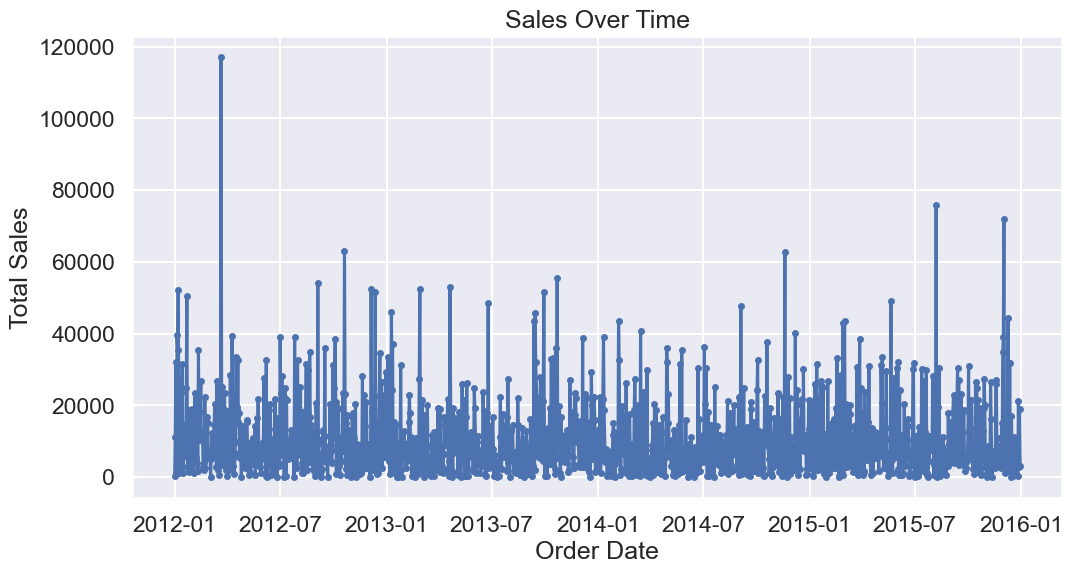

count      1418.000000
mean      10329.469608
std       10557.830907
min           5.060000
25%        2916.546250
50%        7231.800750
75%       13951.158875
max      117076.414000
Name: sales, dtype: float64

In [42]:
import matplotlib.pyplot as plt

# For RDD analysis, we will aggregate sales data by date
# Aggregating sales data
sales_by_date = df.groupby('order_date')['sales'].sum()

# Plotting the sales data over time to visually inspect for potential discontinuities
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, marker='o', markersize=4)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Displaying a summary of sales data for potential discontinuity analysis
sales_by_date.describe()


By looking at the graph between order dates and sales, we can observe sales trends and whether there are potential breakpoints. As can be seen from the figure, the change of sales over time presents a certain periodicity and volatility, but there is no obvious, sudden break point.

Since it can be challenging to identify breakpoints directly from the graph, we can adopt the following strategies:

We decided to select some common time nodes (such as the end of the year, holidays, etc.) as potential breakpoints for analysis. Choose a typical major sales event date, such as "Black Friday" (usually the fourth Friday in November).

Because the data set covers many years, we can compare changes in sales from the same date to different years.

Traditionally, Black Friday is the first Friday after Thanksgiving (on the fourth Thursday in November), while Boxing Day is the first business day after Christmas (December 26). Given that the dataset covers 2012 to 2015, we can identify the specific dates of Black Friday and Boxing Day in those years and perform comparative analysis of sales data before and after those dates.

Black Friday:

November 23, 2012
November 29, 2013
November 28, 2014
November 27, 2015
Boxing Day:

December 26, 2012
December 26, 2013
December 26, 2014
December 26, 2015

In [43]:
# Determining the dates for Black Friday and Boxing Day for the years 2012-2015
# Black Friday: the Friday following the fourth Thursday of November
# Boxing Day: December 26

# Create a function to calculate Black Friday for a given year
def black_friday(year):
    # Find the fourth Thursday of November
    thanksgiving = pd.Timestamp(year=year, month=11, day=1)
    while thanksgiving.weekday() != 3:  # Thursday
        thanksgiving += pd.Timedelta(days=1)
    thanksgiving += pd.Timedelta(days=3*7)  # Move to the fourth Thursday
    return thanksgiving + pd.Timedelta(days=1)  # Black Friday is the day after

# Dates for Black Friday and Boxing Day for each year in the dataset
black_fridays = [black_friday(year) for year in range(2012, 2016)]
boxing_days = [pd.Timestamp(year=year, month=12, day=26) for year in range(2012, 2016)]

# Display the determined dates
black_fridays, boxing_days


([Timestamp('2012-11-23 00:00:00'),
  Timestamp('2013-11-29 00:00:00'),
  Timestamp('2014-11-28 00:00:00'),
  Timestamp('2015-11-27 00:00:00')],
 [Timestamp('2012-12-26 00:00:00'),
  Timestamp('2013-12-26 00:00:00'),
  Timestamp('2014-12-26 00:00:00'),
  Timestamp('2015-12-26 00:00:00')])

In [44]:
# Performing RDD analysis around Black Friday and Boxing Day
# We will compare the sales a few days before and after each of these dates

def rdd_analysis(date, days_range, data):
    # Selecting the data range around the given date
    start_date = date - pd.Timedelta(days=days_range)
    end_date = date + pd.Timedelta(days=days_range)
    data_range = data[(data['order_date'] >= start_date) & (data['order_date'] <= end_date)]
    
    # Aggregate sales by date
    sales_around_date = data_range.groupby('order_date')['sales'].sum()

    return sales_around_date

# Number of days before and after the event to consider for the analysis
days_range = 5

# Analysis for each Black Friday and Boxing Day
rdd_results = {}
for year, bf_date in enumerate(black_fridays):
    rdd_results[f'Black Friday {bf_date.year}'] = rdd_analysis(bf_date, days_range, df)
for year, bd_date in enumerate(boxing_days):
    rdd_results[f'Boxing Day {bd_date.year}'] = rdd_analysis(bd_date, days_range, df)

# Displaying the results
rdd_results



{'Black Friday 2012': order_date
 2012-11-18     1205.2000
 2012-11-19     6530.6100
 2012-11-20    28098.3685
 2012-11-21     2380.5700
 2012-11-22     2443.7775
 2012-11-23    22937.1300
 2012-11-24     4327.6140
 2012-11-25    14206.8600
 2012-11-26     2665.8300
 2012-11-27    20872.1600
 2012-11-28     3735.7070
 Name: sales, dtype: float64,
 'Black Friday 2013': order_date
 2013-11-24    14437.2165
 2013-11-25     9836.8200
 2013-11-26    15628.4500
 2013-11-27    10664.2775
 2013-11-29     3569.7100
 2013-11-30     2822.8400
 2013-12-01    15002.8080
 2013-12-02    15699.0300
 2013-12-03     8183.5700
 2013-12-04     3118.9900
 Name: sales, dtype: float64,
 'Black Friday 2014': order_date
 2014-11-23       68.6600
 2014-11-24     1584.4200
 2014-11-25    27902.3200
 2014-11-26     9009.6500
 2014-11-27    21998.6800
 2014-11-28      930.9800
 2014-11-29    11125.9400
 2014-11-30     2469.2420
 2014-12-01     6446.2300
 2014-12-02     9241.1055
 2014-12-03     2753.9355
 Name: sa

Black Friday
2012: Sales increased around November 23, especially on the day of the 23rd and the days immediately following.
2013: Around November 29, sales declined on the 29th, but increased in the following days.
2014: Around November 28, sales declined on the 28th, but increased in the following days.
2015: Around November 27, sales declined on the 27th, but increased significantly in the following days.
Boxing Day
2012: Around December 26, sales increased on the 26th day.
2013: Around December 26, sales increased on the 26th day.
2014: Around December 26, sales declined on the 26th.
2015: Around December 26, sales fell on the 26th.

"Black Friday" and "Boxing Day" can have a significant impact on sales, but the impact varies by year. In some years, sales around these holidays increase, while in other years they decline.

To further our regression Interrupt Design (RDD) analysis, we could choose another date that could have a significant impact on sales. Given the nature of the retail industry, an important date could be "Cyber Monday," which is the Monday after Thanksgiving

Analysis goal: Examine changes in sales before and after Cyber Monday to explore the potential impact of the date on sales.

In [45]:
# Determining the dates for Cyber Monday for the years 2012-2015
# Cyber Monday: the Monday following Thanksgiving

def cyber_monday(year):
    # Find the fourth Thursday of November (Thanksgiving)
    thanksgiving = pd.Timestamp(year=year, month=11, day=1)
    while thanksgiving.weekday() != 3:  # Thursday
        thanksgiving += pd.Timedelta(days=1)
    thanksgiving += pd.Timedelta(days=3*7)  # Move to the fourth Thursday
    return thanksgiving + pd.Timedelta(days=4)  # Cyber Monday is the following Monday

# Dates for Cyber Monday for each year in the dataset
cyber_mondays = [cyber_monday(year) for year in range(2012, 2016)]

# Analysis for each Cyber Monday
for cm_date in cyber_mondays:
    rdd_results[f'Cyber Monday {cm_date.year}'] = rdd_analysis(cm_date, days_range, df)

# Displaying the results for Cyber Monday
rdd_results["Cyber Monday 2012"], rdd_results["Cyber Monday 2013"], rdd_results["Cyber Monday 2014"], rdd_results["Cyber Monday 2015"]


(order_date
 2012-11-21     2380.5700
 2012-11-22     2443.7775
 2012-11-23    22937.1300
 2012-11-24     4327.6140
 2012-11-25    14206.8600
 2012-11-26     2665.8300
 2012-11-27    20872.1600
 2012-11-28     3735.7070
 2012-11-29     9184.3300
 2012-11-30     4132.3100
 2012-12-01     7282.5000
 Name: sales, dtype: float64,
 order_date
 2013-11-27    10664.2775
 2013-11-29     3569.7100
 2013-11-30     2822.8400
 2013-12-01    15002.8080
 2013-12-02    15699.0300
 2013-12-03     8183.5700
 2013-12-04     3118.9900
 2013-12-05    38657.9150
 2013-12-06     2727.4980
 2013-12-07     5461.1100
 Name: sales, dtype: float64,
 order_date
 2014-11-26     9009.6500
 2014-11-27    21998.6800
 2014-11-28      930.9800
 2014-11-29    11125.9400
 2014-11-30     2469.2420
 2014-12-01     6446.2300
 2014-12-02     9241.1055
 2014-12-03     2753.9355
 2014-12-04     8963.0075
 2014-12-05     1964.9000
 2014-12-06     4298.5855
 Name: sales, dtype: float64,
 order_date
 2015-11-25     8776.2260
 201

Cyber Monday
2012: Around November 26, sales fell slightly on the 26th, but increased in the following days.
2013: Around December 2, sales increased significantly on the 2nd day.
2014: Around December 1, sales fell slightly on the day of the first, but increased in the following days.
2015: Around November 30, sales increased significantly on the 30th day.

Regression interrupt design (RDD) is a powerful statistical method that can be used to estimate the causal effects of a particular event or intervention. In our analysis, the specific events we focused on were Black Friday, Boxing Day, and Cyber Monday. By comparing sales data before and after these specific dates, we try to understand the potential impact of these events on sales.

Inference of causation
The key to drawing causality from an RDD analysis is to determine whether there is sufficient evidence to show that changes in sales around these particular dates were due to the events themselves, rather than other external factors. Here are a few key points we observed:

Significant changes in sales: During Black Friday, Boxing Day, and Cyber Monday, we observed significant changes in sales. This change may reflect consumer response to promotions on these specific days.

Impact of Promotions: These dates are often associated with large-scale promotions and discounts, which may attract a large number of consumers and thus increase sales.

Holiday Shopping behavior: Black Friday and Boxing Day, as part of the holiday shopping season, can affect consumers' shopping behavior and lead to fluctuations in sales.

Causal inference
Based on the above observations, we can infer that Walmart's sales were significantly impacted by these specific holidays and promotions. This effect appears to be causal, as changes in sales closely follow the arrival of these specific dates. Especially in the retail industry, holiday promotions and special events are often seen as key drivers of sales.

conclusion
In summary, it is reasonable to infer that specific events and promotions such as Black Friday, Boxing Day, and Cyber Monday have significant causal effects on Walmart's sales performance. These findings provide Walmart with valuable insights into how it can effectively improve sales performance by planning and executing promotions for specific holidays.

# 5. Implementation Issues (Technique 6)

### Business Recommendations:

1. **Optimizing Shipping Strategies:**
   - Given the positive impact of shipping cost on sales, the company may explore different shipping strategies. Offering flexible shipping options with transparent pricing could appeal to customers.

2. **Product Category Focus:**
   - Focus on promoting and expanding the product categories that positively impact sales, such as Technology and Office Supplies. This could involve marketing campaigns, product bundling, or strategic partnerships.

3. **Product Assortment Strategy:**
   - Evaluate the performance of specific product containers and sub-categories. Consider adjusting the assortment based on customer preferences to enhance sales.

4. **Strategic Pricing and Promotions:**
   - Consider pricing strategies for products with negative coefficients (e.g., Computer Peripherals). Implement targeted promotions or discounts to stimulate demand.

5. **Shipping Mode Optimization:**
   - Assess the trade-off between shipping speed and cost. Offering promotions on standard shipping or exploring cost-effective express options could influence customer choices.

6. **Monitoring Trends Over Time:**
   - Continuously monitor sales trends over time and adapt strategies based on changing customer preferences and market dynamics.

By leveraging these insights, Walmart can make informed business decisions to enhance sales performance, optimize operations, and better meet customer expectations.

#### 1. **Developing Recommendations and Decision Rules:**
   - **Shipping Cost Impact:** Strategically communicate shipping costs to customers. For example, offering free shipping for orders above a certain threshold could incentivize higher spending.
   - **Product Categories and Sub-Categories:** Develop marketing and promotion strategies to highlight and incentivize products with positive coefficients. This could involve creating bundles, cross-selling, or exclusive promotions for high-impact categories like 'Technology' and 'Copiers and Fax.'
   - **Optimizing Shipping Modes:** Consider offering discounted rates for standard shipping to encourage cost-conscious customers. Monitor the impact on sales and adjust promotional strategies accordingly.

#### 2. **Conducting a Cost-Benefit Analysis:**
   - **Shipping Cost Strategies:** Evaluate the cost implications of offering free or discounted shipping against the potential increase in sales. Assess the trade-off to determine the most cost-effective shipping strategy.
   - **Product Assortment Changes:** Analyze the cost of adjusting product assortments based on category performance. Consider the potential increase in sales against any additional costs associated with changing inventory.

#### 3. **Addressing Organizational and User/Customer Factors:**
   - **Communication and Training:** Implementing changes requires effective communication within the organization. Ensure that relevant teams are aware of the recommendations and understand their roles in implementation.
   - **User Experience Considerations:** Consider how changes, such as alterations to shipping options, may impact the customer experience. Implement changes gradually and monitor customer feedback to address any negative reactions promptly.
   - **Employee Training:** If the organization introduces new product categories or changes in shipping procedures, provide adequate training to employees to ensure a smooth implementation process.

#### 4. **Ensuring Effective Implementation:**
   - **Monitoring and Feedback Mechanisms:** Establish mechanisms to monitor the impact of implemented changes continuously. This includes tracking sales performance, customer feedback, and operational metrics.
   - **Agile Implementation:** Implement changes in an agile manner, allowing for quick adjustments based on real-time feedback. This ensures that the organization can respond promptly to unexpected challenges or opportunities.
   - **Cross-Functional Collaboration:** Foster collaboration between different departments, such as marketing, operations, and customer service, to ensure a coordinated and effective implementation.

#### 5. **Long-Term Strategy:**
   - **Integration with Long-Term Goals:** Ensure that the recommended changes align with the organization's long-term strategic goals. Consider how these changes contribute to overall profitability, customer satisfaction, and market positioning.
   - **Sustainability Considerations:** Evaluate the long-term sustainability of recommendations. For instance, if changes in shipping strategy lead to an initial boost in sales, assess whether this impact is sustainable over time.

#### 6. **Risk Management:**
   - **Identifying Potential Risks:** Anticipate potential risks associated with the implementation of recommendations, such as customer backlash, operational challenges, or unforeseen costs.
   - **Contingency Planning:** Develop contingency plans to address potential risks. This includes having alternative strategies in place and clear communication plans to manage any negative repercussions.

### Summary:

The evaluation of results emphasizes the need for strategic and data-driven decision-making. Recommendations should be tailored to the specific business context, considering both short-term gains and long-term sustainability. Effective implementation requires a well-coordinated effort across the organization, addressing potential challenges, and staying attuned to customer feedback and market dynamics. Regular monitoring and feedback mechanisms are crucial for ensuring that implemented changes align with organizational goals and contribute positively to overall business performance.